In [1]:
import pandas as pd

In [2]:
attr_df = pd.read_parquet('/scratch/data/m23csa016/meesho_data/category_attributes.parquet')
attr_df

,Category,No_of_attribute,Attribute_list
0,Men Tshirts,5,"[color, neck, pattern, print_or_pattern_type, ..."
1,Sarees,10,"[blouse_pattern, border, border_width, color, ..."
2,Kurtis,9,"[color, fit_shape, length, occasion, ornamenta..."
3,Women Tshirts,8,"[color, fit_shape, length, pattern, print_or_p..."
4,Women Tops & Tunics,10,"[color, fit_shape, length, neck_collar, ocassi..."


In [3]:
attr_df

,Category,No_of_attribute,Attribute_list
0,Men Tshirts,5,"[color, neck, pattern, print_or_pattern_type, ..."
1,Sarees,10,"[blouse_pattern, border, border_width, color, ..."
2,Kurtis,9,"[color, fit_shape, length, occasion, ornamenta..."
3,Women Tshirts,8,"[color, fit_shape, length, pattern, print_or_p..."
4,Women Tops & Tunics,10,"[color, fit_shape, length, neck_collar, ocassi..."


In [176]:
for i in range(5):
    print(attr_df['Attribute_list'][i])

['color' 'neck' 'pattern' 'print_or_pattern_type' 'sleeve_length']
['blouse_pattern' 'border' 'border_width' 'color' 'occasion'
 'ornamentation' 'pallu_details' 'pattern' 'print_or_pattern_type'
 'transparency']
['color' 'fit_shape' 'length' 'occasion' 'ornamentation' 'pattern'
 'print_or_pattern_type' 'sleeve_length' 'sleeve_styling']
['color' 'fit_shape' 'length' 'pattern' 'print_or_pattern_type'
 'sleeve_length' 'sleeve_styling' 'surface_styling']
['color' 'fit_shape' 'length' 'neck_collar' 'ocassion' 'pattern'
 'print_or_pattern_type' 'sleeve_length' 'sleeve_styling'
 'surface_styling']


In [ ]:
universal_cate_attr = {
 'Men Tshirts': {'color': 'attr_1', 'pattern': 'attr_3', 'print_or_pattern_type': 'attr_4'},
 'Sarees': {'color': 'attr_4', 'pattern': 'attr_8', 'print_or_pattern_type': 'attr_9'},
 'Kurtis': {'color': 'attr_1', 'pattern': 'attr_6', 'print_or_pattern_type': 'attr_7'},
 'Women Tshirts': {'color': 'attr_1', 'pattern': 'attr_4', 'print_or_pattern_type': 'attr_5'},
 'Women Tops & Tunics': {'color': 'attr_1', 'pattern': 'attr_6', 'print_or_pattern_type': 'attr_7'}
}


In [183]:
str(1123).zfill(6) + '.jpg'

'001123.jpg'

In [ ]:
# Category to attribute mapping for color, pattern, and print_or_pattern_type
category_attribute_mapping = {
    'Men Tshirts': {'color': 'attr_1', 'pattern': 'attr_3', 'print_or_pattern_type': 'attr_4'},
    'Sarees': {'color': 'attr_4', 'pattern': 'attr_8', 'print_or_pattern_type': 'attr_9'},
    'Kurtis': {'color': 'attr_1', 'pattern': 'attr_6', 'print_or_pattern_type': 'attr_7'},
    'Women Tshirts': {'color': 'attr_1', 'pattern': 'attr_4', 'print_or_pattern_type': 'attr_5'},
    'Women Tops & Tunics': {'color': 'attr_1', 'pattern': 'attr_6', 'print_or_pattern_type': 'attr_7'}
}

group_specific_attr = {
    'Kurtis': {
        'fit_shape': 'attr_2',
        'length': 'attr_3',
        'sleeve_length': 'attr_8',
        'sleeve_styling': 'attr_9'
    },
    'Women Tshirts': {
        'fit_shape': 'attr_2',
        'length': 'attr_3',
        'sleeve_length': 'attr_6',
        'sleeve_styling': 'attr_7'
    },
    'Women Tops & Tunics': {
        'fit_shape': 'attr_2',
        'length': 'attr_3',
        'sleeve_length': 'attr_8',
        'sleeve_styling': 'attr_9'
    }
}

cs_men_tshirts = { 'Men Tshirts': { 'neck': 'attr_2', 'sleeve_length': 'attr_5' }}
cs_sarees  = {'Sarees': { 'blouse_pattern': 'attr_1', 'border': 'attr_2', 'border_width': 'attr_3', 'occassion': 'attr_5', 'ornamentation': 'attr_6', 'pallu_details': 'attr_7', 'transparency': 'attr_10' }},
cs_kurtis = {'Kurtis': { 'occassion': 'attr_4', 'ornamentation': 'attr_5' }}
cs_women_tops =  {'Women Tops & Tunics': { 'neck_collar': 'attr_4', 'occassion': 'attr_5', 'surface_styling': 'attr_10' }}
cs_women_tshirts =  {'Women Tshirts': { 'surface_styling': 'attr_8' } }



In [181]:
# Category to attribute mapping for color, pattern, and print_or_pattern_type
category_attribute_mapping = {
    'Men Tshirts': {'color': 'attr_1', 'pattern': 'attr_3', 'print_or_pattern_type': 'attr_4'},
    'Sarees': {'color': 'attr_4', 'pattern': 'attr_8', 'print_or_pattern_type': 'attr_9'},
    'Kurtis': {'color': 'attr_1', 'pattern': 'attr_6', 'print_or_pattern_type': 'attr_7'},
    'Women Tshirts': {'color': 'attr_1', 'pattern': 'attr_4', 'print_or_pattern_type': 'attr_5'},
    'Women Tops & Tunics': {'color': 'attr_1', 'pattern': 'attr_6', 'print_or_pattern_type': 'attr_7'}
}

# Function to get attribute value based on category and attribute type
def get_attribute_value(row, attribute_type):
    category = row['Category']
    attribute_column = category_attribute_mapping[category][attribute_type]
    return row[attribute_column]


finaldf = pd.read_csv("final_10k.csv")
# Creating the new dataframe with required columns
new_df = pd.DataFrame()
new_df['id'] = finaldf['id']
new_df['Category'] = finaldf['Category']
new_df['color'] = finaldf.apply(lambda row: get_attribute_value(row, 'color'), axis=1)
new_df['pattern'] = finaldf.apply(lambda row: get_attribute_value(row, 'pattern'), axis=1)
new_df['print_or_pattern_type'] = finaldf.apply(lambda row: get_attribute_value(row, 'print_or_pattern_type'), axis=1)

# Display the new dataframe
new_df.to_csv("universal_attrs_10k.csv", index=False)

In [11]:
import pandas as pd

def create_group_specific_dataframe(input_file, output_file, group_specific_attr):
    # Read the input CSV file
    df = pd.read_csv(input_file)

    # Filter the dataframe to include only categories in group_specific_attr
    filtered_df = df[df['Category'].isin(group_specific_attr.keys())]

    # Create the new dataframe with required columns
    new_df = pd.DataFrame()
    new_df['id'] = filtered_df['id']
    new_df['Category'] = filtered_df['Category']

    # Add group-specific attributes
    for attr in ['fit_shape', 'length', 'sleeve_length', 'sleeve_styling']:
        new_df[attr] = filtered_df.apply(
            lambda row: row[group_specific_attr[row['Category']][attr]], 
            axis=1
        )

    # Export the new dataframe to CSV
    new_df.to_csv(output_file, index=False)
    print(f"New dataframe with correct group-specific attributes exported to {output_file}")

    return new_df

# Define the group-specific attributes
group_specific_attr = {
    'Kurtis': {
        'fit_shape': 'attr_2',
        'length': 'attr_3',
        'sleeve_length': 'attr_8',
        'sleeve_styling': 'attr_9'
    },
    'Women Tshirts': {
        'fit_shape': 'attr_2',
        'length': 'attr_3',
        'sleeve_length': 'attr_6',
        'sleeve_styling': 'attr_7'
    },
    'Women Tops & Tunics': {
        'fit_shape': 'attr_2',
        'length': 'attr_3',
        'sleeve_length': 'attr_8',
        'sleeve_styling': 'attr_9'
    }
}

# Example usage
input_file = "final_10k.csv"
output_file = "correct_group_specific_attrs.csv"
new_df = create_group_specific_dataframe(input_file, output_file, group_specific_attr)

# Display the first few rows of the new dataframe
print(new_df.head())

# Display information about the new dataframe
print(new_df.info())

# Display value counts for the Category column
print(new_df['Category'].value_counts())

# Display a sample of each category
for category in group_specific_attr.keys():
    print(f"\nSample of {category}:")
    print(new_df[new_df['Category'] == category].head(2))

New dataframe with correct group-specific attributes exported to correct_group_specific_attrs.csv
      id Category fit_shape       length          sleeve_length sleeve_styling
0  25994   Kurtis    a-line  calf length  three-quarter sleeves        regular
1  26388   Kurtis  straight  knee length  three-quarter sleeves        regular
2  26440   Kurtis    a-line  calf length  three-quarter sleeves        regular
3  27277   Kurtis    a-line  calf length  three-quarter sleeves        regular
4  27323   Kurtis    a-line  knee length  three-quarter sleeves        regular
<class 'pandas.core.frame.DataFrame'>
Index: 7043 entries, 0 to 11565
Data columns (total 6 columns):
 #   Column          Non-Null Count  Dtype 
---  ------          --------------  ----- 
 0   id              7043 non-null   int64 
 1   Category        7043 non-null   object
 2   fit_shape       7043 non-null   object
 3   length          7043 non-null   object
 4   sleeve_length   7043 non-null   object
 5   sleeve_stylin

In [ ]:
cs_men_tshirts = { 'Men Tshirts': { 'neck': 'attr_2', 'sleeve_length': 'attr_5' }}
cs_sarees  = {'Sarees': { 'blouse_pattern': 'attr_1', 'border': 'attr_2', 'border_width': 'attr_3', 'occassion': 'attr_5', 'ornamentation': 'attr_6', 'pallu_details': 'attr_7', 'transparency': 'attr_10' }},
cs_kurtis = {'Kurtis': { 'occassion': 'attr_4', 'ornamentation': 'attr_5' }}
cs_women_tops =  {'Women Tops & Tunics': { 'neck_collar': 'attr_4', 'occassion': 'attr_5', 'surface_styling': 'attr_10' }}
cs_women_tshirts =  {'Women Tshirts': { 'surface_styling': 'attr_8' } }

In [ ]:
cs_men_tshirts = { 'Men Tshirts': { 'neck': 'attr_2', 'sleeve_length': 'attr_5' }}
cs_sarees  = {'Sarees': { 'blouse_pattern': 'attr_1', 'border': 'attr_2', 'border_width': 'attr_3', 'occassion': 'attr_5', 'ornamentation': 'attr_6', 'pallu_details': 'attr_7', 'transparency': 'attr_10' }},
cs_kurtis = {'Kurtis': { 'occassion': 'attr_4', 'ornamentation': 'attr_5' }}
cs_women_tops =  {'Women Tops & Tunics': { 'neck_collar': 'attr_4', 'occassion': 'attr_5', 'surface_styling': 'attr_10' }}
cs_women_tshirts =  {'Women Tshirts': { 'surface_styling': 'attr_8' } }

# Example usage
input_file = "final_10k.csv"
output_file = "correct_group_specific_attrs.csv"
new_df = create_group_specific_dataframe(input_file, output_file, group_specific_attr)


In [12]:
import pandas as pd

def create_category_specific_dataframe(input_file, output_file, category_attr):
    # Read the input CSV file
    df = pd.read_csv(input_file)

    # Get the category (assuming there's only one key in the dictionary)
    category = list(category_attr.keys())[0]

    # Filter the dataframe to include only the specific category
    filtered_df = df[df['Category'] == category]

    # Create the new dataframe with required columns
    new_df = pd.DataFrame()
    new_df['id'] = filtered_df['id']
    new_df['Category'] = filtered_df['Category']

    # Add category-specific attributes
    for attr, column in category_attr[category].items():
        new_df[attr] = filtered_df[column]

    # Export the new dataframe to CSV
    new_df.to_csv(output_file, index=False)
    print(f"New dataframe for {category} exported to {output_file}")

    return new_df

# Define the category-specific attributes
cs_men_tshirts = {'Men Tshirts': {'neck': 'attr_2', 'sleeve_length': 'attr_5'}}
cs_sarees = {'Sarees': {'blouse_pattern': 'attr_1', 'border': 'attr_2', 'border_width': 'attr_3', 
                        'occassion': 'attr_5', 'ornamentation': 'attr_6', 'pallu_details': 'attr_7', 
                        'transparency': 'attr_10'}}
cs_kurtis = {'Kurtis': {'occassion': 'attr_4', 'ornamentation': 'attr_5'}}
cs_women_tops = {'Women Tops & Tunics': {'neck_collar': 'attr_4', 'occassion': 'attr_5', 'surface_styling': 'attr_10'}}
cs_women_tshirts = {'Women Tshirts': {'surface_styling': 'attr_8'}}

# List of all category-specific dictionaries and their corresponding output files
categories = [
    (cs_men_tshirts, "cs_men_tshirts_10k.csv"),
    (cs_sarees, "cs_sarees_10k.csv"),
    (cs_kurtis, "cs_kurtis_10k.csv"),
    (cs_women_tops, "cs_women_tops_10k.csv"),
    (cs_women_tshirts, "cs_women_tshirts_10k.csv")
]

# Input file
input_file = "final_10k.csv"

# Process each category and create corresponding CSV files
for category_attr, output_file in categories:
    new_df = create_category_specific_dataframe(input_file, output_file, category_attr)

New dataframe for Men Tshirts exported to cs_men_tshirts_10k.csv
New dataframe for Sarees exported to cs_sarees_10k.csv
New dataframe for Kurtis exported to cs_kurtis_10k.csv
New dataframe for Women Tops & Tunics exported to cs_women_tops_10k.csv
New dataframe for Women Tshirts exported to cs_women_tshirts_10k.csv


In [4]:
# Read the Parquet file
df = pd.read_csv('/scratch/data/m23csa016/meesho_data/train.csv')

In [26]:
# Optional: Create a heatmap for visualization
import seaborn as sns
import matplotlib.pyplot as plt
import pandas as pd
import numpy as np

In [33]:
def analyze_value_specific_nulls(df, columns):
    results = {}
    
    for focus_attr in columns:
        unique_values = df[focus_attr].dropna().unique()
        
        for value in unique_values:
            # Filter rows where the focus attribute has this specific value
            value_present = df[df[focus_attr] == value]
            
            # Count nulls in other attributes when this value is present
            other_attrs = [col for col in columns if col != focus_attr]
            null_counts = value_present[other_attrs].isnull().sum()
            
            # Calculate percentages
            percentages = (null_counts / len(value_present) * 100).round(2)
            
            # Only keep attributes with 100% null
            fully_null_attrs = percentages[percentages == 100]
            
            if not fully_null_attrs.empty:
                results[f"{focus_attr}_{value}"] = fully_null_attrs.to_dict()
    
    return results


In [ ]:
men_tshirt_df = df[df['Category'] == "Men Tshirts"]

# List of columns to analyze with generic names
men_tshirt_cols = [
    'attr_1',  # corresponds to 'color'
    'attr_2',  # corresponds to 'neck'
    'attr_3',  # corresponds to 'pattern'
    'attr_4',  # corresponds to 'print_or_pattern_type'
    'attr_5'   # corresponds to 'sleeve_length'
]

# Perform the analysis
men_tshirt_analysis = analyze_value_specific_nulls(men_tshirt_df, men_tshirt_cols)

# Print the results
for value, null_attrs in men_tshirt_analysis.items():
    print(f"\nWhen '{value}' is present:")
    for attr, percentage in null_attrs.items():
        print(f"  '{attr}' is always null (100% of cases)")

# Get unique rows
men_tshirt_unique_rows = men_tshirt_df.drop(columns=['id'])
men_tshirt_unique_rows = men_tshirt_unique_rows.drop_duplicates()

men_tshirt_no_null = men_tshirt_unique_rows.dropna(subset=['attr_1', 'attr_2', 'attr_3', 'attr_4', 'attr_5'])

print(len(men_tshirt_no_null))
# Loop through each column (attr_1 to attr_10)
for col in ['attr_1', 'attr_2', 'attr_3', 'attr_4', 'attr_5']:
    print(f"\nRatios for {col}:")
    print(men_tshirt_no_null[col].value_counts(dropna=False))  # normalize=True gives the ratio

In [122]:
import pandas as pd
import numpy as np

men_tshirt_df = df[df['Category'] == "Men Tshirts"]
men_tshirt_df = men_tshirt_df.dropna(subset=['attr_1', 'attr_2', 'attr_3', 'attr_4', 'attr_5'])
# Assume 'df' is your original dataframe
# First, let's create a column that identifies unique rows
men_tshirt_df['group'] = men_tshirt_df.drop('id', axis=1).apply(tuple, axis=1)

# Now, let's get the proportion of each unique row
group_proportions = men_tshirt_df['group'].value_counts(normalize=True)

# Calculate how many samples we want from each group
samples_per_group = (group_proportions * 2000).round().astype(int)

# Ensure we get exactly 2000 samples by adjusting the largest group
samples_per_group.iloc[0] += 2000 - samples_per_group.sum()

# Create an empty dataframe to store our sampled rows
sampled_df = pd.DataFrame()

# Sample from each group
for group, n_samples in samples_per_group.items():
    group_df = men_tshirt_df[men_tshirt_df['group'] == group]
    
    if len(group_df) > n_samples:
        # If we have more rows than needed, sample randomly
        sampled_group = group_df.sample(n=n_samples, replace=False)
    else:
        # If we don't have enough rows, sample with replacement
        sampled_group = group_df.sample(n=n_samples, replace=True)
    
    sampled_df = pd.concat([sampled_df, sampled_group])

# Reset the index and drop the 'group' column
sampled_df = sampled_df.reset_index(drop=True).drop('group', axis=1)

print(f"Number of samples: {len(sampled_df)}")
print(f"Number of unique samples: {len(sampled_df.drop('id', axis=1).drop_duplicates())}")

# Loop through each column (attr_1 to attr_10)
for col in ['attr_1', 'attr_2', 'attr_3', 'attr_4', 'attr_5']:
    print(f"\nRatios for {col}:")
    print(sampled_df[col].value_counts(dropna=False))  # normalize=True gives the ratio

sampled_df.to_csv("men_tshirt_2000.csv", index=False)

Number of samples: 2000
Number of unique samples: 37

Ratios for attr_1:
attr_1
default       738
multicolor    639
white         414
black         209
Name: count, dtype: int64

Ratios for attr_2:
attr_2
polo     1252
round     748
Name: count, dtype: int64

Ratios for attr_3:
attr_3
solid      1272
printed     728
Name: count, dtype: int64

Ratios for attr_4:
attr_4
solid         1276
default        490
typography     234
Name: count, dtype: int64

Ratios for attr_5:
attr_5
short sleeves    1960
long sleeves       40
Name: count, dtype: int64


In [115]:
sampled_df

,id,Category,len,attr_1,attr_2,attr_3,attr_4,attr_5,attr_6,attr_7,attr_8,attr_9,attr_10
0,1241,Men Tshirts,5,multicolor,polo,solid,solid,short sleeves,NaN,NaN,NaN,NaN,NaN
1,2288,Men Tshirts,5,multicolor,polo,solid,solid,short sleeves,NaN,NaN,NaN,NaN,NaN
2,694,Men Tshirts,5,multicolor,polo,solid,solid,short sleeves,NaN,NaN,NaN,NaN,NaN
3,1578,Men Tshirts,5,multicolor,polo,solid,solid,short sleeves,NaN,NaN,NaN,NaN,NaN
4,2557,Men Tshirts,5,multicolor,polo,solid,solid,short sleeves,NaN,NaN,NaN,NaN,NaN
...,...,...,...,...,...,...,...,...,...,...,...,...,...
995,172,Men Tshirts,5,multicolor,round,printed,typography,long sleeves,NaN,NaN,NaN,NaN,NaN
996,2013,Men Tshirts,5,default,polo,solid,default,short sleeves,NaN,NaN,NaN,NaN,NaN
997,1278,Men Tshirts,5,white,polo,printed,default,short sleeves,NaN,NaN,NaN,NaN,NaN
998,2622,Men Tshirts,5,default,polo,printed,solid,short sleeves,NaN,NaN,NaN,NaN,NaN


In [95]:
# List of columns to analyze with generic names

women_tshirts_cols = [
    'attr_1',  
    'attr_2',  
    'attr_3',  
    'attr_4',  
    'attr_5', 
    'attr_6',
    'attr_7',
    'attr_8'
]

women_tshirts = df[df['Category'] == "Women Tshirts"]

# Perform the analysis
women_tshirt_analysis = analyze_value_specific_nulls(women_tshirts, women_tshirts_cols)

# Print the results
for value, null_attrs in women_tshirt_analysis.items():
    print(f"\nWhen '{value}' is present:")
    for attr, percentage in null_attrs.items():
        print(f"  '{attr}' is always null (100% of cases)")


When 'attr_3_long' is present:
  'attr_8' is always null (100% of cases)

When 'attr_4_default' is present:
  'attr_8' is always null (100% of cases)

When 'attr_7_cuffed sleeves' is present:
  'attr_8' is always null (100% of cases)


In [154]:
# Filter rows for Category 'Women Tshirts'
women_tshirts = df[df['Category'] == "Women Tshirts"]
# Drop duplicates based on all columns except 'id'
unique_rows = women_tshirts.drop_duplicates(subset=women_tshirts.columns.difference(['id']))

# unique_rows = unique_rows.drop_duplicates()

filtered_df = unique_rows.dropna(subset=['attr_1', 'attr_2', 'attr_3', 'attr_4', 'attr_5', 'attr_6', 'attr_7'])
filtered_df['attr_8'] = filtered_df['attr_8'].where(filtered_df['attr_8'].notna(), 'default')

# Loop through each column (attr_1 to attr_10)
for col in women_tshirts_cols:
    print(f"\nRatios for {col}:")
    print(filtered_df[col].value_counts(dropna=False))  # normalize=True gives the ratio


Ratios for attr_1:
attr_1
black         125
default       121
white         118
yellow        111
pink           81
maroon         76
multicolor     70
Name: count, dtype: int64

Ratios for attr_2:
attr_2
regular    433
loose      159
boxy       110
Name: count, dtype: int64

Ratios for attr_3:
attr_3
regular    283
crop       276
long       143
Name: count, dtype: int64

Ratios for attr_4:
attr_4
printed    534
solid       92
default     76
Name: count, dtype: int64

Ratios for attr_5:
attr_5
default        132
typography     127
funky print    123
graphic        109
quirky         106
solid          105
Name: count, dtype: int64

Ratios for attr_6:
attr_6
short sleeves    361
long sleeves     229
default          112
Name: count, dtype: int64

Ratios for attr_7:
attr_7
regular sleeves    583
cuffed sleeves     119
Name: count, dtype: int64

Ratios for attr_8:
attr_8
default     700
applique      2
Name: count, dtype: int64


/tmp/ipykernel_1691957/2624077022.py:9: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  filtered_df['attr_8'] = filtered_df['attr_8'].where(filtered_df['attr_8'].notna(), 'default')


In [152]:
filtered_df

,id,Category,len,attr_1,attr_2,attr_3,attr_4,attr_5,attr_6,attr_7,attr_8,attr_9,attr_10
32435,32601,Women Tshirts,8,multicolor,loose,long,default,default,default,regular sleeves,default,NaN,NaN
32436,32602,Women Tshirts,8,yellow,loose,long,default,default,long sleeves,regular sleeves,default,NaN,NaN
32438,32604,Women Tshirts,8,multicolor,loose,long,default,default,long sleeves,regular sleeves,default,NaN,NaN
32447,32613,Women Tshirts,8,default,boxy,long,default,graphic,default,regular sleeves,default,NaN,NaN
32449,32615,Women Tshirts,8,yellow,boxy,crop,printed,funky print,long sleeves,cuffed sleeves,default,NaN,NaN
...,...,...,...,...,...,...,...,...,...,...,...,...,...
46063,46229,Women Tshirts,8,white,regular,regular,printed,typography,short sleeves,regular sleeves,applique,NaN,NaN
47245,47411,Women Tshirts,8,white,regular,crop,printed,solid,short sleeves,regular sleeves,default,NaN,NaN
48133,48299,Women Tshirts,8,white,regular,crop,printed,typography,short sleeves,regular sleeves,applique,NaN,NaN
48654,48820,Women Tshirts,8,white,regular,crop,printed,typography,short sleeves,regular sleeves,default,NaN,NaN


In [155]:
import pandas as pd
import numpy as np

women_tshirt = df[df['Category'] == "Women Tshirts"]

women_tshirts_cols = [
    'attr_1',  
    'attr_2',  
    'attr_3',  
    'attr_4',  
    'attr_5', 
    'attr_6',
    'attr_7',
    'attr_8'
]

women_tshirt = women_tshirt.dropna(subset=['attr_1', 'attr_2', 'attr_3', 'attr_4', 'attr_5', 'attr_6', 'attr_7'])
women_tshirt['attr_8'] = women_tshirt['attr_8'].where(women_tshirt['attr_8'].notna(), 'default')

women_tshirt = women_tshirt.dropna(subset=women_tshirts_cols)
# Assume 'df' is your original dataframe
# First, let's create a column that identifies unique rows
women_tshirt['group'] = women_tshirt.drop('id', axis=1).apply(tuple, axis=1)

# Now, let's get the proportion of each unique row
group_proportions = women_tshirt['group'].value_counts(normalize=True)

# Calculate how many samples we want from each group
samples_per_group = (group_proportions * 1300).round().astype(int)

# Ensure we get exactly 1300 samples by adjusting the largest group
samples_per_group.iloc[0] += 1300 - samples_per_group.sum()

# Create an empty dataframe to store our sampled rows
sampled_df = pd.DataFrame()

# Sample from each group
for group, n_samples in samples_per_group.items():
    group_df = women_tshirt[women_tshirt['group'] == group]
    
    if len(group_df) > n_samples:
        # If we have more rows than needed, sample randomly
        sampled_group = group_df.sample(n=n_samples, replace=False)
    else:
        # If we don't have enough rows, sample with replacement
        sampled_group = group_df.sample(n=n_samples, replace=True)
    
    sampled_df = pd.concat([sampled_df, sampled_group])

# Reset the index and drop the 'group' column
sampled_df = sampled_df.reset_index(drop=True).drop('group', axis=1)

print(f"Number of samples: {len(sampled_df)}")
print(f"Number of unique samples: {len(sampled_df.drop('id', axis=1).drop_duplicates())}")

sampled_df = pd.concat([sampled_df, filtered_df], axis=0)

# Loop through each column (attr_1 to attr_10)
for col in women_tshirts_cols:
    print(f"\nRatios for {col}:")
    print(sampled_df[col].value_counts(dropna=False))  # normalize=True gives the ratio

sampled_df.to_csv("women_tshirt_2000.csv", index=False)

Number of samples: 1300
Number of unique samples: 275

Ratios for attr_1:
attr_1
white         490
default       395
black         376
yellow        254
pink          182
multicolor    179
maroon        126
Name: count, dtype: int64

Ratios for attr_2:
attr_2
regular    1539
loose       281
boxy        182
Name: count, dtype: int64

Ratios for attr_3:
attr_3
regular    973
crop       743
long       286
Name: count, dtype: int64

Ratios for attr_4:
attr_4
printed    1708
default     160
solid       134
Name: count, dtype: int64

Ratios for attr_5:
attr_5
typography     566
funky print    439
default        316
graphic        267
quirky         265
solid          149
Name: count, dtype: int64

Ratios for attr_6:
attr_6
short sleeves    1531
long sleeves      321
default           150
Name: count, dtype: int64

Ratios for attr_7:
attr_7
regular sleeves    1828
cuffed sleeves      174
Name: count, dtype: int64

Ratios for attr_8:
attr_8
default     2000
applique       2
Name: count, dtype:

In [70]:
unique_rows.isna().sum()

Category       0
len            0
attr_1       357
attr_2       826
attr_3       337
attr_4       614
attr_5       314
attr_6       602
attr_7       829
attr_8      2102
attr_9      2251
attr_10     2251
dtype: int64

In [79]:
filtered_df = unique_rows.dropna(subset=['attr_1', 'attr_2', 'attr_3', 'attr_4', 'attr_5', 'attr_6', 'attr_7'])
filtered_df['attr_8'] = filtered_df['attr_8'].where(filtered_df['attr_8'].notna(), 'default')

/tmp/ipykernel_1691957/25260082.py:2: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  filtered_df['attr_8'] = filtered_df['attr_8'].where(filtered_df['attr_8'].notna(), 'default')


In [88]:
# Loop through each column (attr_1 to attr_10)
for col in ['attr_1', 'attr_2', 'attr_3', 'attr_4', 'attr_5', 'attr_6', 'attr_7', 'attr_8', 'attr_9', 'attr_10']:
    print(f"\nRatios for {col}:")
    print(filtered_df[col].value_counts(dropna=False))  # normalize=True gives the ratio


Ratios for attr_1:
attr_1
black         125
default       121
white         118
yellow        111
pink           81
maroon         76
multicolor     70
Name: count, dtype: int64

Ratios for attr_2:
attr_2
regular    433
loose      159
boxy       110
Name: count, dtype: int64

Ratios for attr_3:
attr_3
regular    283
crop       276
long       143
Name: count, dtype: int64

Ratios for attr_4:
attr_4
printed    534
solid       92
default     76
Name: count, dtype: int64

Ratios for attr_5:
attr_5
default        132
typography     127
funky print    123
graphic        109
quirky         106
solid          105
Name: count, dtype: int64

Ratios for attr_6:
attr_6
short sleeves    361
long sleeves     229
default          112
Name: count, dtype: int64

Ratios for attr_7:
attr_7
regular sleeves    583
cuffed sleeves     119
Name: count, dtype: int64

Ratios for attr_8:
attr_8
default     700
applique      2
Name: count, dtype: int64

Ratios for attr_9:
attr_9
NaN    702
Name: count, dtype: in

In [41]:
sarees_cols = [
    'attr_1',  
    'attr_2',  
    'attr_3',  
    'attr_4',  
    'attr_5', 
    'attr_6',
    'attr_7',
    'attr_8',
    'attr_9',
    'attr_10'
]

sarees_df = df[df['Category'] == "Sarees"]

# Perform the analysis
sarees_analysis = analyze_value_specific_nulls(sarees_df, sarees_cols)

# Print the results
for value, null_attrs in sarees_analysis.items():
    print(f"\nWhen '{value}' is present:")
    for attr, percentage in null_attrs.items():
        print(f"  '{attr}' is always null (100% of cases)")

In [133]:
import pandas as pd
import numpy as np

sarees_df = df[df['Category'] == "Sarees"]

sarees_cols = [
    'attr_1',  
    'attr_2',  
    'attr_3',  
    'attr_4',  
    'attr_5', 
    'attr_6',
    'attr_7',
    'attr_8',
    'attr_9',
    'attr_10'
]

sarees_df = sarees_df.dropna(subset=sarees_cols)
# Assume 'df' is your original dataframe
# First, let's create a column that identifies unique rows
sarees_df['group'] = sarees_df.drop('id', axis=1).apply(tuple, axis=1)

# Now, let's get the proportion of each unique row
group_proportions = sarees_df['group'].value_counts(normalize=True)

# Calculate how many samples we want from each group
samples_per_group = (group_proportions * 2000).round().astype(int)

# Ensure we get exactly 1300 samples by adjusting the largest group
samples_per_group.iloc[0] += 2000 - samples_per_group.sum()

# Create an empty dataframe to store our sampled rows
sampled_df = pd.DataFrame()

# Sample from each group
for group, n_samples in samples_per_group.items():
    group_df = sarees_df[sarees_df['group'] == group]
    
    if len(group_df) > n_samples:
        # If we have more rows than needed, sample randomly
        sampled_group = group_df.sample(n=n_samples, replace=False)
    else:
        # If we don't have enough rows, sample with replacement
        sampled_group = group_df.sample(n=n_samples, replace=True)
    
    # sampled_df = pd.concat([sampled_df, sampled_group])

# Reset the index and drop the 'group' column
sampled_df = sampled_df.reset_index(drop=True).drop('group', axis=1)

print(f"Number of samples: {len(sampled_df)}")
print(f"Number of unique samples: {len(sampled_df.drop('id', axis=1).drop_duplicates())}")

# Loop through each column (attr_1 to attr_10)
for col in sarees_cols:
    print(f"\nRatios for {col}:")
    print(sampled_df[col].value_counts(dropna=False))  # normalize=True gives the ratio

sampled_df.to_csv("sarees_2000.csv", index=False)

Number of samples: 2000
Number of unique samples: 441

Ratios for attr_1:
attr_1
same as saree     1463
same as border     346
default            126
solid               65
Name: count, dtype: int64

Ratios for attr_2:
attr_2
zari             1181
woven design      475
temple border     182
default            95
solid              38
no border          29
Name: count, dtype: int64

Ratios for attr_3:
attr_3
small border    1425
big border       544
no border         31
Name: count, dtype: int64

Ratios for attr_4:
attr_4
cream         651
multicolor    590
default       325
white         229
green          59
navy blue      55
yellow         48
pink           43
Name: count, dtype: int64

Ratios for attr_5:
attr_5
party          1405
traditional     389
daily           186
wedding          20
Name: count, dtype: int64

Ratios for attr_6:
attr_6
jacquard               1558
default                 229
tassels and latkans     213
Name: count, dtype: int64

Ratios for attr_7:
attr_7
woven 

In [7]:
def sample_and_export(df, columns, sample_size, output_file):
    # Drop rows with NaN values in specified columns
    # df_clean = df.dropna(subset=columns)
    df_clean = df.copy()
    
    # Create a column that identifies unique rows
    df_clean['group'] = df_clean[columns].apply(tuple, axis=1)
    
    # Get the proportion of each unique row
    group_proportions = df_clean['group'].value_counts(normalize=True)
    
    # Calculate how many samples we want from each group
    samples_per_group = (group_proportions * sample_size).round().astype(int)
    
    # Ensure we get exactly the desired sample size by adjusting the largest group
    samples_per_group.iloc[0] += sample_size - samples_per_group.sum()
    
    # Create an empty dataframe to store our sampled rows
    sampled_df = pd.DataFrame()
    
    # Sample from each group
    for group, n_samples in samples_per_group.items():
        group_df = df_clean[df_clean['group'] == group]
        
        if len(group_df) > n_samples:
            # If we have more rows than needed, sample randomly
            sampled_group = group_df.sample(n=n_samples, replace=False)
        else:
            # If we don't have enough rows, sample with replacement
            sampled_group = group_df.sample(n=n_samples, replace=True)
        
        sampled_df = pd.concat([sampled_df, sampled_group])
    
    # Reset the index and drop the 'group' column
    sampled_df = sampled_df.reset_index(drop=True).drop('group', axis=1)
    
    print(f"Number of samples: {len(sampled_df)}")
    print(f"Number of unique samples: {len(sampled_df[columns].drop_duplicates())}")
    
    # Loop through each column and print ratios
    for col in columns:
        print(f"\nRatios for {col}:")
        print(sampled_df[col].value_counts(dropna=False, normalize=True))
    
    # Export to CSV
    sampled_df.to_csv(output_file, index=False)
    print(f"\nSampled data exported to {output_file}")

In [ ]:
sarees_df = df[df['Category'] == "Sarees"]

sarees_cols = [
    'attr_1',  
    'attr_2',  
    'attr_3',  
    'attr_4',  
    'attr_5', 
    'attr_6',
    'attr_7',
    'attr_8',
    'attr_9',
    'attr_10'
]

sample_and_export(sarees_df, sarees_cols, 4000, "sarees_4k.csv")

In [49]:
kurtis_cols = [
    'attr_1',  
    'attr_2',  
    'attr_3',  
    'attr_4',  
    'attr_5', 
    'attr_6',
    'attr_7',
    'attr_8',
    'attr_9'
]

kurtis_df = df[df['Category'] == "Kurtis"]

# Perform the analysis
kurtis_analysis = analyze_value_specific_nulls(kurtis_df, kurtis_cols)

# Print the results
for value, null_attrs in kurtis_analysis.items():
    print(f"\nWhen '{value}' is present:")
    for attr, percentage in null_attrs.items():
        print(f"  '{attr}' is always null (100% of cases)")

In [136]:
import pandas as pd
import numpy as np

kurtis_df = df[df['Category'] == "Kurtis"]

kurtis_cols = [
    'attr_1',  
    'attr_2',  
    'attr_3',  
    'attr_4',  
    'attr_5', 
    'attr_6',
    'attr_7',
    'attr_8',
    'attr_9'
]

kurtis_df = kurtis_df.dropna(subset=kurtis_cols)
# Assume 'df' is your original dataframe
# First, let's create a column that identifies unique rows
kurtis_df['group'] = kurtis_df.drop('id', axis=1).apply(tuple, axis=1)

# Now, let's get the proportion of each unique row
group_proportions = kurtis_df['group'].value_counts(normalize=True)

# Calculate how many samples we want from each group
samples_per_group = (group_proportions * 2000).round().astype(int)

# Ensure we get exactly 1300 samples by adjusting the largest group
samples_per_group.iloc[0] += 2000 - samples_per_group.sum()

# Create an empty dataframe to store our sampled rows
sampled_df = pd.DataFrame()

# Sample from each group
for group, n_samples in samples_per_group.items():
    group_df = kurtis_df[kurtis_df['group'] == group]
    
    if len(group_df) > n_samples:
        # If we have more rows than needed, sample randomly
        sampled_group = group_df.sample(n=n_samples, replace=False)
    else:
        # If we don't have enough rows, sample with replacement
        sampled_group = group_df.sample(n=n_samples, replace=True)
    
    sampled_df = pd.concat([sampled_df, sampled_group])

# Reset the index and drop the 'group' column
sampled_df = sampled_df.reset_index(drop=True).drop('group', axis=1)

print(f"Number of samples: {len(sampled_df)}")
print(f"Number of unique samples: {len(sampled_df.drop('id', axis=1).drop_duplicates())}")

# Loop through each column (attr_1 to attr_10)
for col in kurtis_cols:
    print(f"\nRatios for {col}:")
    print(sampled_df[col].value_counts(dropna=False))  # normalize=True gives the ratio

sampled_df.to_csv("kurtis_2000.csv", index=False)

Number of samples: 2000
Number of unique samples: 171

Ratios for attr_1:
attr_1
black         586
red           466
maroon        384
navy blue     330
blue           71
green          40
yellow         30
pink           29
multicolor     23
purple         16
white          14
grey           10
orange          1
Name: count, dtype: int64

Ratios for attr_2:
attr_2
straight    1259
a-line       741
Name: count, dtype: int64

Ratios for attr_3:
attr_3
knee length    1667
calf length     333
Name: count, dtype: int64

Ratios for attr_4:
attr_4
daily    1965
party      35
Name: count, dtype: int64

Ratios for attr_5:
attr_5
net        1656
default     344
Name: count, dtype: int64

Ratios for attr_6:
attr_6
default    1273
solid       727
Name: count, dtype: int64

Ratios for attr_7:
attr_7
default    1276
solid       724
Name: count, dtype: int64

Ratios for attr_8:
attr_8
three-quarter sleeves    1795
short sleeves             149
sleeveless                 56
Name: count, dtype: int64


In [ ]:
tops_cols = [
    'attr_1',  
    'attr_2',  
    'attr_3',  
    'attr_4',  
    'attr_5', 
    'attr_6',
    'attr_7',
    'attr_8',
    'attr_9',
    'attr_10'
]

tops_df = df[df['Category'] == "Women Tops & Tunics"]

# Perform the analysis
tops_analysis = analyze_value_specific_nulls(tops_df, tops_cols)

# Print the results
for value, null_attrs in tops_analysis.items():
    print(f"\nWhen '{value}' is present:")
    for attr, percentage in null_attrs.items():
        print(f"  '{attr}' is always null (100% of cases)")


# Get unique rows
tops_unique_rows = tops_df.drop(columns=['id'])
tops_unique_rows = tops_unique_rows.drop_duplicates()

tops_no_null = tops_unique_rows.dropna(subset=['attr_1', 'attr_2', 'attr_3', 'attr_4', 'attr_5', 'attr_6', 'attr_7', 'attr_8', 'attr_9', 'attr_10'])

print(len(tops_no_null))
# Loop through each column (attr_1 to attr_10)
for col in ['attr_1', 'attr_2', 'attr_3', 'attr_4', 'attr_5', 'attr_6', 'attr_7', 'attr_8', 'attr_9', 'attr_10']:
    print(f"\nRatios for {col}:")
    print(tops_no_null[col].value_counts(dropna=False))  # normalize=True gives the ratio


In [137]:
import pandas as pd
import numpy as np

tops_df = df[df['Category'] == "Women Tops & Tunics"]

tops_cols = [
    'attr_1',  
    'attr_2',  
    'attr_3',  
    'attr_4',  
    'attr_5', 
    'attr_6',
    'attr_7',
    'attr_8',
    'attr_9',
    'attr_10'
]

tops_df = tops_df.dropna(subset=tops_cols)
# Assume 'df' is your original dataframe
# First, let's create a column that identifies unique rows
tops_df['group'] = tops_df.drop('id', axis=1).apply(tuple, axis=1)

# Now, let's get the proportion of each unique row
group_proportions = tops_df['group'].value_counts(normalize=True)

# Calculate how many samples we want from each group
samples_per_group = (group_proportions * 2000).round().astype(int)

# Ensure we get exactly 1300 samples by adjusting the largest group
samples_per_group.iloc[0] += 2000 - samples_per_group.sum()

# Create an empty dataframe to store our sampled rows
sampled_df = pd.DataFrame()

# Sample from each group
for group, n_samples in samples_per_group.items():
    group_df = tops_df[tops_df['group'] == group]
    
    if len(group_df) > n_samples:
        # If we have more rows than needed, sample randomly
        sampled_group = group_df.sample(n=n_samples, replace=False)
    else:
        # If we don't have enough rows, sample with replacement
        sampled_group = group_df.sample(n=n_samples, replace=True)
    
    sampled_df = pd.concat([sampled_df, sampled_group])

# Reset the index and drop the 'group' column
sampled_df = sampled_df.reset_index(drop=True).drop('group', axis=1)

print(f"Number of samples: {len(sampled_df)}")
print(f"Number of unique samples: {len(sampled_df.drop('id', axis=1).drop_duplicates())}")

# Loop through each column (attr_1 to attr_10)
for col in tops_cols:
    print(f"\nRatios for {col}:")
    print(sampled_df[col].value_counts(dropna=False))  # normalize=True gives the ratio

sampled_df.to_csv("tops_2000.csv", index=False)

Number of samples: 2000
Number of unique samples: 667

Ratios for attr_1:
attr_1
white         971
black         256
default       125
pink          122
yellow        108
maroon         83
blue           77
red            75
peach          52
green          49
navy blue      43
multicolor     39
Name: count, dtype: int64

Ratios for attr_2:
attr_2
boxy       961
fitted     592
regular    374
default     73
Name: count, dtype: int64

Ratios for attr_3:
attr_3
crop       1440
regular     560
Name: count, dtype: int64

Ratios for attr_4:
attr_4
round neck         1539
high                176
v-neck              114
sweetheart neck      64
default              53
square neck          41
stylised             13
Name: count, dtype: int64

Ratios for attr_5:
attr_5
casual    1996
party        4
Name: count, dtype: int64

Ratios for attr_6:
attr_6
printed    1173
solid       767
default      60
Name: count, dtype: int64

Ratios for attr_7:
attr_7
typography    936
solid         789
default    

In [ ]:
men_tshirt_df
women_tshirts
kurtis_df
sarees_df
tops_df

In [50]:
import pandas as pd

def filter_complete_rows(df, attributes):
    return df.dropna(subset=attributes)

# Define dataframes and their corresponding attribute counts
df_configs = [
    ("men_tshirt_df", 5),
    ("women_tshirts", 8),
    ("kurtis_df", 9),
    ("sarees_df", 10),
    ("tops_df", 10)
]

# Dictionary to store filtered dataframes
filtered_dfs = {}

# Process each dataframe
for df_name, attr_count in df_configs:
    # Get the dataframe object using the name string
    df = globals()[df_name]
    
    # Generate attribute names dynamically
    attributes_to_check = [f'attr_{i}' for i in range(1, attr_count + 1)]
    
    # Filter the dataframe
    filtered_df = filter_complete_rows(df, attributes_to_check)
    filtered_dfs[df_name] = filtered_df
    
    # Print results
    print(f"\nResults for {df_name}:")
    print(f"Attributes checked: {attributes_to_check}")
    print(f"Original shape: {df.shape}")
    print(f"Filtered shape: {filtered_df.shape}")
    print(f"Rows kept: {filtered_df.shape[0] / df.shape[0] * 100:.2f}%")


Results for men_tshirt_df:
Attributes checked: ['attr_1', 'attr_2', 'attr_3', 'attr_4', 'attr_5']
Original shape: (18346, 13)
Filtered shape: (7448, 13)
Rows kept: 40.60%

Results for women_tshirts:
Attributes checked: ['attr_1', 'attr_2', 'attr_3', 'attr_4', 'attr_5', 'attr_6', 'attr_7', 'attr_8']
Original shape: (18774, 13)
Filtered shape: (258, 13)
Rows kept: 1.37%

Results for kurtis_df:
Attributes checked: ['attr_1', 'attr_2', 'attr_3', 'attr_4', 'attr_5', 'attr_6', 'attr_7', 'attr_8', 'attr_9']
Original shape: (6822, 13)
Filtered shape: (1465, 13)
Rows kept: 21.47%

Results for sarees_df:
Attributes checked: ['attr_1', 'attr_2', 'attr_3', 'attr_4', 'attr_5', 'attr_6', 'attr_7', 'attr_8', 'attr_9', 'attr_10']
Original shape: (18346, 13)
Filtered shape: (2237, 13)
Rows kept: 12.19%

Results for tops_df:
Attributes checked: ['attr_1', 'attr_2', 'attr_3', 'attr_4', 'attr_5', 'attr_6', 'attr_7', 'attr_8', 'attr_9', 'attr_10']
Original shape: (19004, 13)
Filtered shape: (4070, 13)
Row

In [139]:
import os
root = "/iitjhome/m23csa016/meesho_code/samples_2k"
kurtis_df = pd.read_csv(os.path.join(root, "kurtis_2000.csv"))

# Loop through each column (attr_1 to attr_10)
for col in kurtis_cols:
    print(f"\nRatios for {col}:")
    print(kurtis_df[col].value_counts(dropna=False))  # normalize=True gives the ratio


Ratios for attr_1:
attr_1
black         586
red           466
maroon        384
navy blue     330
blue           71
green          40
yellow         30
pink           29
multicolor     23
purple         16
white          14
grey           10
orange          1
Name: count, dtype: int64

Ratios for attr_2:
attr_2
straight    1259
a-line       741
Name: count, dtype: int64

Ratios for attr_3:
attr_3
knee length    1667
calf length     333
Name: count, dtype: int64

Ratios for attr_4:
attr_4
daily    1965
party      35
Name: count, dtype: int64

Ratios for attr_5:
attr_5
net        1656
default     344
Name: count, dtype: int64

Ratios for attr_6:
attr_6
default    1273
solid       727
Name: count, dtype: int64

Ratios for attr_7:
attr_7
default    1276
solid       724
Name: count, dtype: int64

Ratios for attr_8:
attr_8
three-quarter sleeves    1795
short sleeves             149
sleeveless                 56
Name: count, dtype: int64

Ratios for attr_9:
attr_9
regular       1929
sleevele

In [140]:
men_tshirt_df = pd.read_csv(os.path.join(root, "men_tshirt_2000.csv"))

# Loop through each column (attr_1 to attr_10)
for col in men_tshirt_cols:
    print(f"\nRatios for {col}:")
    print(men_tshirt_df[col].value_counts(dropna=False))  # normalize=True gives the ratio


Ratios for attr_1:
attr_1
default       738
multicolor    639
white         414
black         209
Name: count, dtype: int64

Ratios for attr_2:
attr_2
polo     1252
round     748
Name: count, dtype: int64

Ratios for attr_3:
attr_3
solid      1272
printed     728
Name: count, dtype: int64

Ratios for attr_4:
attr_4
solid         1276
default        490
typography     234
Name: count, dtype: int64

Ratios for attr_5:
attr_5
short sleeves    1960
long sleeves       40
Name: count, dtype: int64


In [141]:
sarees_df = pd.read_csv(os.path.join(root, "sarees_2000.csv"))

# Loop through each column (attr_1 to attr_10)
for col in sarees_cols:
    print(f"\nRatios for {col}:")
    print(sarees_df[col].value_counts(dropna=False))  # normalize=True gives the ratio


Ratios for attr_1:
attr_1
same as saree     1463
same as border     346
default            126
solid               65
Name: count, dtype: int64

Ratios for attr_2:
attr_2
zari             1181
woven design      475
temple border     182
default            95
solid              38
no border          29
Name: count, dtype: int64

Ratios for attr_3:
attr_3
small border    1425
big border       544
no border         31
Name: count, dtype: int64

Ratios for attr_4:
attr_4
cream         651
multicolor    590
default       325
white         229
green          59
navy blue      55
yellow         48
pink           43
Name: count, dtype: int64

Ratios for attr_5:
attr_5
party          1405
traditional     389
daily           186
wedding          20
Name: count, dtype: int64

Ratios for attr_6:
attr_6
jacquard               1558
default                 229
tassels and latkans     213
Name: count, dtype: int64

Ratios for attr_7:
attr_7
woven design     1191
zari woven        351
same as saree   

In [142]:
tops_df = pd.read_csv(os.path.join(root, "tops_2000.csv"))

# Loop through each column (attr_1 to attr_10)
for col in tops_cols:
    print(f"\nRatios for {col}:")
    print(tops_df[col].value_counts(dropna=False))  # normalize=True gives the ratio


Ratios for attr_1:
attr_1
white         971
black         256
default       125
pink          122
yellow        108
maroon         83
blue           77
red            75
peach          52
green          49
navy blue      43
multicolor     39
Name: count, dtype: int64

Ratios for attr_2:
attr_2
boxy       961
fitted     592
regular    374
default     73
Name: count, dtype: int64

Ratios for attr_3:
attr_3
crop       1440
regular     560
Name: count, dtype: int64

Ratios for attr_4:
attr_4
round neck         1539
high                176
v-neck              114
sweetheart neck      64
default              53
square neck          41
stylised             13
Name: count, dtype: int64

Ratios for attr_5:
attr_5
casual    1996
party        4
Name: count, dtype: int64

Ratios for attr_6:
attr_6
printed    1173
solid       767
default      60
Name: count, dtype: int64

Ratios for attr_7:
attr_7
typography    936
solid         789
default       120
quirky         74
graphic        54
floral     

In [156]:
women_tshirt_df = pd.read_csv(os.path.join(root, "women_tshirt_2000.csv"))

# Loop through each column (attr_1 to attr_10)
for col in women_tshirts_cols:
    print(f"\nRatios for {col}:")
    print(women_tshirt_df[col].value_counts(dropna=False))  # normalize=True gives the ratio


Ratios for attr_1:
attr_1
white         490
default       395
black         376
yellow        254
pink          182
multicolor    179
maroon        126
Name: count, dtype: int64

Ratios for attr_2:
attr_2
regular    1539
loose       281
boxy        182
Name: count, dtype: int64

Ratios for attr_3:
attr_3
regular    973
crop       743
long       286
Name: count, dtype: int64

Ratios for attr_4:
attr_4
printed    1708
default     160
solid       134
Name: count, dtype: int64

Ratios for attr_5:
attr_5
typography     566
funky print    439
default        316
graphic        267
quirky         265
solid          149
Name: count, dtype: int64

Ratios for attr_6:
attr_6
short sleeves    1531
long sleeves      321
default           150
Name: count, dtype: int64

Ratios for attr_7:
attr_7
regular sleeves    1828
cuffed sleeves      174
Name: count, dtype: int64

Ratios for attr_8:
attr_8
default     2000
applique       2
Name: count, dtype: int64


In [157]:
final_10k = pd.concat([tops_df, men_tshirt_df, women_tshirt_df, sarees_df, kurtis_df], axis=0)

In [145]:
# Loop through each column (attr_1 to attr_10)
for col in sarees_cols:
    print(f"\nRatios for {col}:")
    print(final_10k[col].value_counts(dropna=False))  # normalize=True gives the ratio


Ratios for attr_1:
attr_1
white             1889
same as saree     1463
black             1427
default           1384
multicolor         880
maroon             593
red                541
yellow             392
navy blue          373
same as border     346
pink               333
blue               148
green               89
solid               65
peach               52
purple              16
grey                10
orange               1
Name: count, dtype: int64

Ratios for attr_2:
attr_2
regular          1913
straight         1259
polo             1252
zari             1181
boxy             1143
round             748
a-line            741
fitted            592
woven design      475
loose             281
temple border     182
default           168
solid              38
no border          29
Name: count, dtype: int64

Ratios for attr_3:
attr_3
crop            2183
knee length     1667
regular         1533
small border    1425
solid           1272
printed          728
big border       54

In [146]:
final_10k

,id,Category,len,attr_1,attr_2,attr_3,attr_4,attr_5,attr_6,attr_7,attr_8,attr_9,attr_10
0,68020.0,Women Tops & Tunics,10,white,boxy,crop,round neck,casual,printed,typography,short sleeves,regular sleeves,default
1,60837.0,Women Tops & Tunics,10,white,boxy,crop,round neck,casual,printed,typography,short sleeves,regular sleeves,default
2,52200.0,Women Tops & Tunics,10,white,boxy,crop,round neck,casual,printed,typography,short sleeves,regular sleeves,default
3,68383.0,Women Tops & Tunics,10,white,boxy,crop,round neck,casual,printed,typography,short sleeves,regular sleeves,default
4,65253.0,Women Tops & Tunics,10,white,boxy,crop,round neck,casual,printed,typography,short sleeves,regular sleeves,default
...,...,...,...,...,...,...,...,...,...,...,...,...,...
1995,26444.0,Kurtis,9,green,a-line,knee length,daily,net,solid,solid,sleeveless,sleeveless,NaN
1996,26443.0,Kurtis,9,purple,a-line,knee length,daily,net,solid,solid,sleeveless,sleeveless,NaN
1997,26413.0,Kurtis,9,blue,a-line,calf length,party,net,solid,solid,three-quarter sleeves,regular,NaN
1998,26388.0,Kurtis,9,grey,straight,knee length,daily,default,default,default,three-quarter sleeves,regular,NaN


In [158]:
# Find duplicate 'id' values
duplicate_ids = final_10k[final_10k.duplicated(subset=['id'], keep=False)]  # keep=False shows all duplicates

# Print the count of duplicate ids
print(f"Number of duplicate IDs: {duplicate_ids['id'].nunique()}")

# Print the duplicate rows
print("\nDuplicate rows based on ID:")
print(duplicate_ids)

Number of duplicate IDs: 712

Duplicate rows based on ID:
         id             Category  len  attr_1    attr_2       attr_3  \
0     68020  Women Tops & Tunics   10   white      boxy         crop   
1     60837  Women Tops & Tunics   10   white      boxy         crop   
2     52200  Women Tops & Tunics   10   white      boxy         crop   
3     68383  Women Tops & Tunics   10   white      boxy         crop   
4     65253  Women Tops & Tunics   10   white      boxy         crop   
...     ...                  ...  ...     ...       ...          ...   
1925  26341               Kurtis    9  purple  straight  knee length   
1926  26395               Kurtis    9   green    a-line  knee length   
1927  26395               Kurtis    9   green    a-line  knee length   
1929  25871               Kurtis    9  yellow    a-line  knee length   
1931  25871               Kurtis    9  yellow    a-line  knee length   

          attr_4   attr_5   attr_6      attr_7                 attr_8  \
0   

In [159]:
final_10k['id'].isnull().sum()

0

In [160]:
final_10k.to_csv("final_10k.csv", index=False)

In [171]:
final_10k = pd.read_csv("final_10k.csv")
# Loop through each column (attr_1 to attr_10)
for col in sarees_cols:
    print(f"\nRatios for {col}:")
    print(final_10k[col].value_counts(dropna=False))  # normalize=True gives the ratio


Ratios for attr_1:
attr_1
white             2080
same as saree     1702
black             1624
default           1600
multicolor         924
maroon             650
red                594
same as border     493
yellow             484
pink               458
navy blue          391
blue               225
green              143
solid              102
peach               61
grey                20
purple              16
orange               1
Name: count, dtype: int64

Ratios for attr_2:
attr_2
regular          2349
zari             1441
boxy             1326
straight         1261
polo             1252
fitted            985
a-line            749
round             748
woven design      527
loose             281
default           250
temple border     242
solid              79
no border          78
Name: count, dtype: int64

Ratios for attr_3:
attr_3
crop            2617
regular         2132
small border    1670
knee length     1669
solid           1272
big border       744
printed          72

In [172]:
final_10k

,id,Category,len,attr_1,attr_2,attr_3,attr_4,attr_5,attr_6,attr_7,attr_8,attr_9,attr_10
0,25994,Kurtis,9,grey,a-line,calf length,daily,default,default,default,three-quarter sleeves,regular,NaN
1,26388,Kurtis,9,grey,straight,knee length,daily,default,default,default,three-quarter sleeves,regular,NaN
2,26440,Kurtis,9,grey,a-line,calf length,daily,default,solid,solid,three-quarter sleeves,regular,NaN
3,27277,Kurtis,9,grey,a-line,calf length,daily,default,solid,solid,three-quarter sleeves,regular,NaN
4,27323,Kurtis,9,grey,a-line,knee length,daily,default,default,default,three-quarter sleeves,regular,NaN
...,...,...,...,...,...,...,...,...,...,...,...,...,...
11563,26444,Kurtis,9,green,a-line,knee length,daily,net,solid,solid,sleeveless,sleeveless,NaN
11564,26443,Kurtis,9,purple,a-line,knee length,daily,net,solid,solid,sleeveless,sleeveless,NaN
11565,26413,Kurtis,9,blue,a-line,calf length,party,net,solid,solid,three-quarter sleeves,regular,NaN
11566,26388,Kurtis,9,grey,straight,knee length,daily,default,default,default,three-quarter sleeves,regular,NaN


In [20]:
import pandas as pd

# Read the DataFrame from CSV
df = pd.read_csv("/iitjhome/m23csa016/meesho_code/1_missing_attrs/cs_kurtis_1_missing.csv")

# Loop through the rows using itertuples
for c in df.itertuples():
    # Print the id
    print(c.id)
    
    # Get the column names starting from the third one onward (ignoring 'id' and 'Category')
    attributes = [col for col in df.columns[2:]]  # Checks if the value in that column is not null
    
    # Join the column names with a comma
    attributes_str = ', '.join(attributes)
    
    # Generate the prompt using column names
    prompt = f"Analyze this {c.Category} image and identify {attributes_str}."
    
    print(prompt)
    break  # Remove this break if you want to process all rows

for i, col in enumerate(df.columns[2:]):
    print(i)


25830
Analyze this Kurtis image and identify occassion, ornamentation.
0
1


In [36]:
results = []
output_texts = ["default, default"]

# Read the DataFrame from CSV
df = pd.read_csv("/iitjhome/m23csa016/meesho_code/1_missing_attrs/cs_kurtis_1_missing.csv")
df = df.iloc[[1]]

for idx, category, txt in zip(df["id"], df['Category'], output_texts):
    result = {'id': idx, 'Category': category}

    predictions = txt.split(",")
    for i, col in enumerate(df.columns[2:]):
        result[col] = predictions[i]

    results.append(result)


In [37]:
print(results)


[{'id': 25967, 'Category': 'Kurtis', 'occassion': 'default', 'ornamentation': ' default'}]


In [39]:
TEST_IMG_DIR = "/scratch/data/m23csa016/test_images/"
FINETUNING_DIR = "/scratch/data/m23csa016/finetuning"
CSV_DIR = "/iitjhome/m23csa016/meesho_code/1_missing_attrs"

MAX_PIXELS = 1280*28*28
import os
adapter_paths = {
    'cs_kurtis': {
        'model': os.path.join(FINETUNING_DIR, "cs_kurtis"),
        'csv_path': os.path.join(CSV_DIR, "cs_kurtis_1_missing.csv")
    },
    'cs_men_tshirts': {
        'model': os.path.join(FINETUNING_DIR, "cs_men_tshirts"),
        'csv_path': os.path.join(CSV_DIR, "cs_men_tshirts_1_missing.csv")
    },
    'cs_sarees': {
        'model': os.path.join(FINETUNING_DIR, "cs_sarees"),
        'csv_path': os.path.join(CSV_DIR, "cs_sarees_1_missing.csv")
    },
    'cs_women_tops': {
        'model': os.path.join(FINETUNING_DIR, "cs_women_tops"),
        'csv_path': os.path.join(CSV_DIR, "cs_women_tops_1_missing.csv")
    },
    'universal_attrs': {
        'model': os.path.join(FINETUNING_DIR, "universal_attrs"),
        'csv_path': os.path.join(CSV_DIR, "universal_attrs_1_missing.csv")
    },
    'cs_women_tshirts': {
        'model': os.path.join(FINETUNING_DIR, "cs_women_tshirts"),
        'csv_path': os.path.join(CSV_DIR, "cs_women_tshirts_1_missing.csv")
    },
    'women_group_attrs': {
        'model': os.path.join(FINETUNING_DIR, "women_group_attrs"),
        'csv_path': os.path.join(CSV_DIR, "women_group_attrs_1_missing.csv")
    },
}

for dataset, values in adapter_paths.items():
    adapter_path = values['model']
    csv_path = values['csv_path']

    print(dataset, adapter_path, csv_path)
    break

cs_kurtis /scratch/data/m23csa016/finetuning/cs_kurtis /iitjhome/m23csa016/meesho_code/1_missing_attrs/cs_kurtis_1_missing.csv


In [ ]:
# Load data
import pandas as pd
import os
import csv
import torch
from qwen_vl_utils import process_vision_info
from transformers import Qwen2VLForConditionalGeneration, AutoProcessor
from peft import PeftModel, PeftConfig

# Define directories and constants
TEST_IMG_DIR = "/scratch/data/m23csa016/meesho_data/train_images/"
FINETUNING_DIR = "/scratch/data/m23csa016/meesho_data/finetuning"
CSV_DIR = "/iitjhome/m23csa016/meesho_code/1_missing_attrs"
MAX_PIXELS = 1280 * 28 * 28


prompt = f"Analyze this {c.Category} image and identify {attributes_str}."

messages = []
message = [{
    "role": "user",
    "content": [
        {"type": "image", "image": os.path.join(TEST_IMG_DIR, image_name)},
        {"type": "text", "text": prompt}
    ]
}]

messages.append(message)

model_name = "Qwen/Qwen2-VL-7B-Instruct"

model = Qwen2VLForConditionalGeneration.from_pretrained(
    model_name,
    torch_dtype=torch.float16,
    attn_implementation="flash_attention_2",
    device_map="auto",
    cache_dir=FINETUNING_DIR,
    offload_buffers=True, 
    offload_folder="offload",  # Specify offload folder
    offload_state_dict=True,  # Enable state dict offloading
)

# Load PEFT adapter
peft_config = PeftConfig.from_pretrained(adapter_path)
model = PeftModel.from_pretrained(model, adapter_path)
model.set_adapter("default")
# model = model.to("cuda")

# Load processor
processor = AutoProcessor.from_pretrained(model_name, cache_dir=FINETUNING_DIR, max_pixels=MAX_PIXELS)

# Process inputs for the model
texts = [processor.apply_chat_template(msg, tokenize=False, add_generation_prompt=True) for msg in messages]
image_inputs, video_inputs = process_vision_info(messages)
inputs = processor(
    text=texts,
    images=image_inputs,
    videos=video_inputs,
    padding=True,
    return_tensors="pt",
)
inputs = inputs.to("cuda")

# Generate predictions
with torch.no_grad():
    generated_ids = model.generate(**inputs, max_new_tokens=128,  num_beams=1,  # Use greedy decoding
                do_sample=False,  # Disable sampling
                temperature=1.0,  # Neutral temperature
    )

# Post-process outputs
generated_ids_trimmed = [out_ids[len(in_ids):] for in_ids, out_ids in zip(inputs.input_ids, generated_ids)]
output_texts = processor.batch_decode(generated_ids_trimmed, skip_special_tokens=True, clean_up_tokenization_spaces=False)

print(output_texts)

In [1]:
from transformers import Qwen2VLForConditionalGeneration, AutoTokenizer, AutoProcessor
from qwen_vl_utils import process_vision_info
import pandas as pd
import os
import csv
from concurrent.futures import ThreadPoolExecutor, as_completed
import torch
from qwen_vl_utils import process_vision_info
from transformers import Qwen2VLForConditionalGeneration, AutoProcessor
from peft import PeftModel, PeftConfig
import torch

TEST_IMG_DIR = "/scratch/data/m23csa016/meesho_data/train_images/"
FINETUNING_DIR = "/scratch/data/m23csa016/meesho_data/finetuning"
CSV_DIR = "/iitjhome/m23csa016/meesho_code/1_missing_attrs"
MAX_PIXELS = 1280 * 28 * 28

# default: Load the model on the available device(s)
# model = Qwen2VLForConditionalGeneration.from_pretrained(
#     "Qwen/Qwen2-VL-7B-Instruct", torch_dtype="auto", device_map="auto"
# )

# We recommend enabling flash_attention_2 for better acceleration and memory saving, especially in multi-image and video scenarios.
model = Qwen2VLForConditionalGeneration.from_pretrained(
    "Qwen/Qwen2-VL-7B-Instruct",
    torch_dtype=torch.bfloat16,
    attn_implementation="flash_attention_2",
    device_map="cuda",
    cache_dir="/scratch/data/m23csa016/meesho_data/finetuning"
)

adapter_path = "/scratch/data/m23csa016/meesho_data/finetuning/wild_fine_20k/checkpoint-12600"
# default processer
processor = AutoProcessor.from_pretrained("Qwen/Qwen2-VL-7B-Instruct", cache_dir="/scratch/data/m23csa016/meesho_data/finetuning")

model = PeftModel.from_pretrained(model, adapter_path)

# Activate the adapter (this step is typically not needed for PEFT models as they're active by default)
# model.set_adapter("default")
# The default range for the number of visual tokens per image in the model is 4-16384. You can set min_pixels and max_pixels according to your needs, such as a token count range of 256-1280, to balance speed and memory usage.
# min_pixels = 256*28*28
# max_pixels = 1280*28*28
# processor = AutoProcessor.from_pretrained("Qwen/Qwen2-VL-7B-Instruct", min_pixels=min_pixels, max_pixels=max_pixels)


Unrecognized keys in `rope_scaling` for 'rope_type'='default': {'mrope_section'}
You are attempting to use Flash Attention 2.0 without specifying a torch dtype. This might lead to unexpected behaviour
`Qwen2VLRotaryEmbedding` can now be fully parameterized by passing the model config through the `config` argument. All other arguments will be removed in v4.46


Loading checkpoint shards:   0%|          | 0/5 [00:00<?, ?it/s]

In [5]:

messages = [
    {
        "role": "user",
        "content": [
            {
                "type": "image",
                "image": "/scratch/data/m23csa016/meesho_data/train_images/031042.jpg",
            },
            {"type": "text", "text": "Given this product image of 'Kurtis' category, what are color, fit_shape, length, occasion, ornamentation, pattern, print_or_pattern_type, sleeve_length, sleeve_styling of the product?"},
        ],
    }
]

# Preparation for inference
text = processor.apply_chat_template(
    messages, tokenize=False, add_generation_prompt=True
)
image_inputs, video_inputs = process_vision_info(messages)
inputs = processor(
    text=[text],
    images=image_inputs,
    videos=video_inputs,
    padding=True,
    return_tensors="pt",
)
inputs = inputs.to("cuda")

# Inference: Generation of the output
generated_ids = model.generate(**inputs, max_new_tokens=1024)
generated_ids_trimmed = [
    out_ids[len(in_ids) :] for in_ids, out_ids in zip(inputs.input_ids, generated_ids)
]
output_text = processor.batch_decode(
    generated_ids_trimmed, skip_special_tokens=True, clean_up_tokenization_spaces=False
)
print(output_text)


["'default', 'straight', 'long', 'party', '', 'solid', 'solid', 'long sleeves', 'default'"]


In [11]:
pred = output_text[0]
pred = pred.replace("'", "")
print(pred.split(","))

predictions = pred.split(",")

for p in predictions:
    print(p.strip())

['round', ' short sleeves']
round
short sleeves


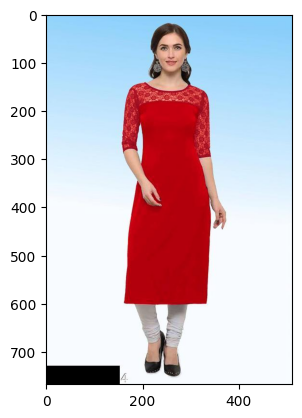

In [6]:
img = "/scratch/data/m23csa016/meesho_data/train_images/031042.jpg"

import matplotlib.pyplot as plt

img = plt.imread(img)
plt.imshow(img)

In [3]:
!export PATH="/iitjhome/m23csa016/.conda/envs/meesho/bin:$PATH"

huggingface/tokenizers: The current process just got forked, after parallelism has already been used. Disabling parallelism to avoid deadlocks...
To disable this warning, you can either:
	- Avoid using `tokenizers` before the fork if possible
	- Explicitly set the environment variable TOKENIZERS_PARALLELISM=(true | false)


In [4]:
!python /iitjhome/m23csa016/meesho_code/cat_specific_attrs_fine/finetuning.py

Started training for cs_men_tshirts


huggingface/tokenizers: The current process just got forked, after parallelism has already been used. Disabling parallelism to avoid deadlocks...
To disable this warning, you can either:
	- Avoid using `tokenizers` before the fork if possible
	- Explicitly set the environment variable TOKENIZERS_PARALLELISM=(true | false)


Finished training for cs_men_tshirts
All training jobs completed.


In [1]:
import csv
from typing import Dict, List

def read_csv(file_path: str) -> List[Dict[str, str]]:
    with open(file_path, 'r') as f:
        return list(csv.DictReader(f))

def write_csv(file_path: str, data: List[Dict[str, str]], fieldnames: List[str]):
    with open(file_path, 'w', newline='') as f:
        writer = csv.DictWriter(f, fieldnames=fieldnames)
        writer.writeheader()
        writer.writerows(data)

def merge_csv_files(predicted_file: str, missing_attr_file: str, output_file: str, category_mappings: Dict[str, Dict[str, str]]):
    predicted_data = read_csv(predicted_file)
    missing_attr_data = read_csv(missing_attr_file)

    # Create a dictionary for quick lookup of predicted data
    predicted_dict = {row['id']: row for row in predicted_data}

    # Update missing attributes
    for row in missing_attr_data:
        if row['id'] in predicted_dict:
            predicted_row = predicted_dict[row['id']]
            category = row['Category']
            
            if category in category_mappings:
                attr_mapping = category_mappings[category]
                for attr, column in attr_mapping.items():
                    # Only fill the attribute if it's empty in the missing attributes CSV
                    if column in predicted_row and (attr not in row or row[attr] == ''):
                        row[attr] = predicted_row[column]

    # Write the updated data to the output file
    write_csv(output_file, missing_attr_data, missing_attr_data[0].keys())

category_mappings = {
    'Men Tshirts': {
        'attr_1': 'color',
        'attr_2': 'neck',
        'attr_3': 'pattern',
        'attr_4': 'print_or_pattern_type',
        'attr_5': 'sleeve_length'
    },
    'Sarees': {
        'attr_1': 'blouse_pattern',
        'attr_2': 'border',
        'attr_3': 'border_width',
        'attr_4': 'color',
        'attr_5': 'occassion',
        'attr_6': 'ornamentation',
        'attr_7': 'pallu_details',
        'attr_8': 'pattern',
        'attr_9': 'print_or_pattern_type',
        'attr_10': 'transparency'
    },
    'Kurtis': {
        'attr_1': 'color',
        'attr_2': 'fit_shape',
        'attr_3': 'length',
        'attr_4': 'occassion',
        'attr_5': 'ornamentation',
        'attr_6': 'pattern',
        'attr_7': 'print_or_pattern_type',
        'attr_8': 'sleeve_length',
        'attr_9': 'sleeve_styling'
    },
    'Women Tshirts': {
        'attr_1': 'color',
        'attr_2': 'fit_shape',
        'attr_3': 'length',
        'attr_4': 'pattern',
        'attr_5': 'print_or_pattern_type',
        'attr_6': 'sleeve_length',
        'attr_7': 'sleeve_styling',
        'attr_8': 'surface_styling'
    },
    'Women Tops & Tunics': {
        'attr_1': 'color',
        'attr_2': 'fit_shape',
        'attr_3': 'length',
        'attr_4': 'neck_collar',
        'attr_5': 'occassion',
        'attr_6': 'pattern',
        'attr_7': 'print_or_pattern_type',
        'attr_8': 'sleeve_length',
        'attr_9': 'sleeve_styling',
        'attr_10': 'surface_styling'
    }
}


In [2]:
def iterative_merge_process(code_dir: str, predicted_files: List[str], initial_missing_file: str, category_mappings: Dict[str, Dict[str, str]]):
    missing_attr_file = initial_missing_file

    for i, file in enumerate(predicted_files, 1):
        pred_file = os.path.join(code_dir, file)
        output_file = f'{i}_missing_replaced.csv'
        output_path = os.path.join(code_dir, output_file)

        merge_csv_files(pred_file, missing_attr_file, output_path, category_mappings)
        print(f"Iteration {i}: Merged CSV file has been created: {output_path}")

        missing_attr_file = output_path

    print("All iterations completed.")

In [5]:
import os
predicted_files = [
    "cat_specific_attrs_fine/pred/predicted_cs_men_tshirts.csv",
    "cat_specific_attrs_fine/pred/predicted_cs_women_tshirts.csv",
    "cat_specific_attrs_fine/pred/predicted_cs_kurtis.csv",
    "cat_specific_attrs_fine/pred/predicted_cs_women_tops.csv",
    "cat_specific_attrs_fine/pred/predicted_cs_sarees.csv",
    "universal_attrs_fine/pred/predicted_universal_attrs.csv",
    "women_group_attrs_fine/pred/predicted_women_group_attrs.csv"   
]

code_dir = "/iitjhome/m23csa016/meesho_code"

initial_missing_file = os.path.join(code_dir, "1_missing_attrs/data_1_missing.csv")
iterative_merge_process(code_dir, predicted_files, initial_missing_file, category_mappings)

Iteration 1: Merged CSV file has been created: /iitjhome/m23csa016/meesho_code/1_missing_replaced.csv
Iteration 2: Merged CSV file has been created: /iitjhome/m23csa016/meesho_code/2_missing_replaced.csv
Iteration 3: Merged CSV file has been created: /iitjhome/m23csa016/meesho_code/3_missing_replaced.csv
Iteration 4: Merged CSV file has been created: /iitjhome/m23csa016/meesho_code/4_missing_replaced.csv
Iteration 5: Merged CSV file has been created: /iitjhome/m23csa016/meesho_code/5_missing_replaced.csv
Iteration 6: Merged CSV file has been created: /iitjhome/m23csa016/meesho_code/6_missing_replaced.csv
Iteration 7: Merged CSV file has been created: /iitjhome/m23csa016/meesho_code/7_missing_replaced.csv
All iterations completed.


In [12]:
import pandas as pd
final_10k = pd.read_csv("final_10k.csv")
missing_replaced = pd.read_csv("7_missing_replaced.csv")

final_train = pd.concat([final_10k, missing_replaced])
final_train.to_csv("all_attrs.csv", index=False)

In [11]:
# Loop through each column (attr_1 to attr_10)
cols = ['attr_1', 'attr_2', 'attr_3', 'attr_4', 'attr_5', 'attr_6', 'attr_7', 'attr_8', 'attr_9', 'attr_10']

for col in cols:
    with open('ratio.txt', 'a') as f:
        f.write(f"\nRatios for {col}:\n")
        f.write(final_train[col].value_counts(dropna=False).to_string())
        f.write("\n")


In [15]:
import pandas as pd
submission = pd.read_csv("/iitjhome/m23csa016/meesho_code/all_attrs_fine/submission.csv")

In [18]:
import csv

def modify_csv(input_file, output_file):
    with open(input_file, 'r', newline='') as infile, open(output_file, 'w', newline='') as outfile:
        reader = csv.DictReader(infile)
        fieldnames = reader.fieldnames

        writer = csv.DictWriter(outfile, fieldnames=fieldnames)
        writer.writeheader()

        for row in reader:
            if row['Category'] == 'Sarees':
                row['attr_5'] = 'party'
            
            if row['Category'] == 'Women Tshirts':
                row['attr_4'] = 'printed'

            writer.writerow(row)

# Usage
input_file = "/iitjhome/m23csa016/meesho_code/submission_11k_direct.csv"
output_file = 'output.csv'
modify_csv(input_file, output_file)
print(f"Modified CSV has been written to {output_file}")

Modified CSV has been written to output.csv


In [7]:
submission.to_csv("farzi_submission.csv", index=False)

In [1]:
import pdb

In [2]:
import torch
import torch.nn as nn
import torch.optim as optim
from torch.utils.data import Dataset, DataLoader
from PIL import Image
import pandas as pd
import clip
from collections import defaultdict
import numpy as np
import os
from tqdm.auto import tqdm
import time

# Category to attribute mapping
category_class_attribute_mapping = {
    'Kurtis': {
        'color': 'attr_1',
        'fit_shape': 'attr_2',
        'length': 'attr_3',
        'occasion': 'attr_4',
        'ornamentation': 'attr_5',
        'pattern': 'attr_6',
        'print_or_pattern_type': 'attr_7',
        'sleeve_length': 'attr_8',
        'sleeve_styling': 'attr_9'
    },
    'Men Tshirts': {
        'color': 'attr_1',
        'neck': 'attr_2',
        'pattern': 'attr_3',
        'print_or_pattern_type': 'attr_4',
        'sleeve_length': 'attr_5'
    },
    'Sarees': {
        'blouse_pattern': 'attr_1',
        'border': 'attr_2',
        'border_width': 'attr_3',
        'color': 'attr_4',
        'occasion': 'attr_5',
        'ornamentation': 'attr_6',
        'pallu_details': 'attr_7',
        'pattern': 'attr_8',
        'print_or_pattern_type': 'attr_9',
        'transparency': 'attr_10'
    },
    'Women Tops & Tunics': {
        'color': 'attr_1',
        'fit_shape': 'attr_2',
        'length': 'attr_3',
        'neck_collar': 'attr_4',
        'occasion': 'attr_5',
        'pattern': 'attr_6',
        'print_or_pattern_type': 'attr_7',
        'sleeve_length': 'attr_8',
        'sleeve_styling': 'attr_9',
        'surface_styling': 'attr_10'
    },
    'Women Tshirts': {
        'color': 'attr_1',
        'fit_shape': 'attr_2',
        'length': 'attr_3',
        'pattern': 'attr_4',
        'print_or_pattern_type': 'attr_5',
        'sleeve_length': 'attr_6',
        'sleeve_styling': 'attr_7',
        'surface_styling': 'attr_8'
    }
}

# Custom collate function to handle different categories and their attributes
def custom_collate_fn(batch):
    # Separate images, categories, and targets
    images = torch.stack([item[0] for item in batch])
    categories = [item[1] for item in batch]
    
    # Initialize an empty targets dict with all possible category-attribute combinations
    targets = {}
    for category, attrs in category_class_attribute_mapping.items():
        for attr_name in attrs.keys():
            key = f"{category}_{attr_name}"
            targets[key] = torch.full((len(batch),), -1, dtype=torch.long)
    
    # Fill in the actual values
    for batch_idx, (_, category, item_targets) in enumerate(batch):
        for key, value in item_targets.items():
            if key in targets:
                targets[key][batch_idx] = value
    
    return images, categories, targets

class ProductDataset(Dataset):
    def __init__(self, csv_path, image_dir, train=True):
        self.df = pd.read_csv(csv_path)
        self.image_dir = image_dir
        self.train = train
        
        # Load CLIP model
        self.clip_model, self.clip_preprocess = clip.load("ViT-B/32", device="cuda")
        
        # Store category-wise attribute information
        self.category_attributes = category_class_attribute_mapping
        
        # Create attribute encoders and store unique values for each attribute
        self.attribute_encoders = {}
        self.attribute_classes = {}
        
        # Initialize all possible category-attribute combinations
        for category, attributes in self.category_attributes.items():
            category_data = self.df[self.df['Category'] == category]
            
            for attr_name, attr_col in attributes.items():
                # Get unique values excluding NULL/dummy values
                unique_values = category_data[attr_col][
                    (category_data[attr_col].notna()) & 
                    (category_data[attr_col] != 'dummy')
                ].unique()
                
                key = f"{category}_{attr_name}"
                self.attribute_classes[key] = list(unique_values)
                self.attribute_encoders[key] = {
                    value: idx for idx, value in enumerate(unique_values)
                }
    
    def __len__(self):
        return len(self.df)

    def __getitem__(self, idx):
        row = self.df.iloc[idx]
        category = row['Category']
        image_path = f"{self.image_dir}/{row['id'].astype(str).zfill(6)}.jpg"
        
        try:
            # Load and preprocess image
            image = Image.open(image_path).convert('RGB')
            image = self.clip_preprocess(image)
            
            # Initialize targets with all possible category-attribute combinations
            targets = {}
            for cat, attrs in self.category_attributes.items():
                for attr_name, attr_col in attrs.items():
                    key = f"{cat}_{attr_name}"
                    # Default value is -1 (ignore index)
                    targets[key] = -1
            
            # Fill in the actual values for this category
            category_attrs = self.category_attributes[category]
            for attr_name, attr_col in category_attrs.items():
                value = row[attr_col]
                key = f"{category}_{attr_name}"
                
                if pd.isna(value) or value == 'dummy':
                    targets[key] = -1
                else:
                    targets[key] = self.attribute_encoders[key].get(value, -1)
            
            return image, category, targets
            
        except Exception as e:
            print(f"Error loading image {image_path}: {str(e)}")
            # Return default values with all possible category-attribute combinations
            targets = {
                f"{cat}_{attr}": -1 
                for cat in self.category_attributes
                for attr in self.category_attributes[cat].keys()
            }
            return torch.zeros((3, 224, 224)), category, targets

class CategoryAwareAttributePredictor(nn.Module):
    def __init__(self, clip_dim=512, category_attributes=None, attribute_dims=None):
        super(CategoryAwareAttributePredictor, self).__init__()
        
        self.category_attributes = category_attributes
        
        # Create prediction heads for each category-attribute combination
        self.attribute_predictors = nn.ModuleDict()
        
        for category, attributes in category_attributes.items():
            for attr_name in attributes.keys():
                key = f"{category}_{attr_name}"
                if key in attribute_dims:
                    self.attribute_predictors[key] = nn.Sequential(
                        nn.Linear(clip_dim, 512),
                        nn.ReLU(),
                        nn.Dropout(0.2),
                        nn.Linear(512, attribute_dims[key])
                    )
    
    def forward(self, clip_features, category):
        results = {}
        category_attrs = self.category_attributes[category]

        clip_features = clip_features.float()
        
        for attr_name in category_attrs.keys():
            key = f"{category}_{attr_name}"
            if key in self.attribute_predictors:
                results[key] = self.attribute_predictors[key](clip_features)
        
        return results

def train_model(model, train_loader, val_loader, device, num_epochs=10):
    optimizer = optim.AdamW(model.parameters(), lr=0.00001, weight_decay=0.01)
    scheduler = optim.lr_scheduler.ReduceLROnPlateau(optimizer, mode='min', patience=2)
    criterion = nn.CrossEntropyLoss(ignore_index=-1)
    
    clip_model, _ = clip.load("ViT-B/32", device=device)
    clip_model.eval()

    # Option 1: Set requires_grad=False for all parameters
    for param in clip_model.parameters():
        param.requires_grad = False
    
    best_val_loss = float('inf')
    best_model_state = None
    
    # Main epoch progress bar
    epoch_pbar = tqdm(range(num_epochs), desc='Training Progress', position=0)
    
    for epoch in epoch_pbar:
        # Training phase
        model.train()
        train_loss = 0.0
        attr_correct = defaultdict(int)
        attr_total = defaultdict(int)
        
        # Batch progress bar for training
        train_pbar = tqdm(train_loader, 
                         desc=f'Epoch {epoch+1}/{num_epochs} [Train]', 
                         leave=False, 
                         position=1)
        
        for images, categories, targets in train_pbar:
            images = images.to(device)
            batch_size = images.size(0)
            
            with torch.no_grad():
                clip_features = clip_model.encode_image(images)
            
            total_loss = 0
            batch_attr_correct = defaultdict(int)
            
            for i in range(batch_size):
                category = categories[i]
                img_features = clip_features[i].unsqueeze(0)
                predictions = model(img_features, category)
                
                for key, pred in predictions.items():
                    target_val = targets[key][i]
                    if target_val != -1:
                        target_tensor = torch.tensor([target_val]).to(device)
                        loss = criterion(pred, target_tensor)
                        total_loss += loss
                        
                        _, predicted = torch.max(pred, 1)
                        is_correct = (predicted == target_tensor).item()
                        attr_correct[key] += is_correct
                        attr_total[key] += 1
                        batch_attr_correct[key] += is_correct
            
            if total_loss > 0:
                optimizer.zero_grad()
                total_loss.backward()
                optimizer.step()
                train_loss += total_loss.item()
            
            # Update training progress bar with current batch metrics
            train_pbar.set_postfix({
                'loss': f'{total_loss.item():.4f}',
                'avg_acc': f'{sum(batch_attr_correct.values()) / max(sum(attr_total.values()), 1):.2%}'
            })
        
        # Validation phase
        model.eval()
        val_loss = 0.0
        val_attr_correct = defaultdict(int)
        val_attr_total = defaultdict(int)
        
        # Batch progress bar for validation
        val_pbar = tqdm(val_loader, 
                       desc=f'Epoch {epoch+1}/{num_epochs} [Val]', 
                       leave=False,
                       position=1)
        
        with torch.no_grad():
            for images, categories, targets in val_pbar:
                images = images.to(device)
                batch_size = images.size(0)
                
                clip_features = clip_model.encode_image(images)
                total_loss = 0
                batch_attr_correct = defaultdict(int)
                
                for i in range(batch_size):
                    category = categories[i]
                    img_features = clip_features[i].unsqueeze(0)
                    predictions = model(img_features, category)
                    
                    for key, pred in predictions.items():
                        target_val = targets[key][i]
                        if target_val != -1:
                            target_tensor = torch.tensor([target_val]).to(device)
                            loss = criterion(pred, target_tensor)
                            total_loss += loss
                            
                            _, predicted = torch.max(pred, 1)
                            is_correct = (predicted == target_tensor).item()
                            val_attr_correct[key] += is_correct
                            val_attr_total[key] += 1
                            batch_attr_correct[key] += is_correct
                
                if total_loss > 0:
                    val_loss += total_loss.item()
                
                # Update validation progress bar with current batch metrics
                val_pbar.set_postfix({
                    'loss': f'{total_loss.item():.4f}',
                    'avg_acc': f'{sum(batch_attr_correct.values()) / max(sum(val_attr_total.values()), 1):.2%}'
                })
        
        # Calculate epoch metrics
        avg_train_loss = train_loss / len(train_loader)
        avg_val_loss = val_loss / len(val_loader)
        
        # Calculate average accuracies
        train_acc = sum(attr_correct.values()) / max(sum(attr_total.values()), 1)
        val_acc = sum(val_attr_correct.values()) / max(sum(val_attr_total.values()), 1)
        
        # Update main progress bar with epoch metrics
        epoch_pbar.set_postfix({
            'train_loss': f'{avg_train_loss:.4f}',
            'val_loss': f'{avg_val_loss:.4f}',
            'train_acc': f'{train_acc:.2%}',
            'val_acc': f'{val_acc:.2%}'
        })
        
        # Print detailed metrics for each attribute
        print(f'\nEpoch {epoch+1}/{num_epochs} Detailed Metrics:')
        for key in attr_total.keys():
            if attr_total[key] > 0:
                train_acc = 100 * attr_correct[key] / attr_total[key]
                val_acc = 100 * val_attr_correct[key] / max(val_attr_total[key], 1)
                print(f'{key}: Train Acc: {train_acc:.2f}%, Val Acc: {val_acc:.2f}%')
        
        # Update learning rate
        scheduler.step(avg_val_loss)
        
        # Save best model
        if avg_val_loss < best_val_loss:
            best_val_loss = avg_val_loss
            best_model_state = model.state_dict().copy()
            print(f'\nNew best model saved! (Val Loss: {avg_val_loss:.4f})')
        
        print('-' * 80)
    
    model.load_state_dict(best_model_state)
    return model

def predict_attributes(model, image_path, category, dataset, device):
    # Load and preprocess image
    image = Image.open(image_path).convert('RGB')
    image = dataset.clip_preprocess(image)
    image = image.unsqueeze(0).to(device)
    
    # Get CLIP features
    with torch.no_grad():
        clip_features = dataset.clip_model.encode_image(image)
        predictions = model(clip_features, category)
    
    # Convert predictions to attribute values
    predicted_attributes = {}
    for key, pred in predictions.items():
        _, predicted_idx = torch.max(pred, 1)
        predicted_idx = predicted_idx.item()
        
        # Get attribute name from key (category_attribute)
        attr_name = key.split('_', 1)[1]
        
        # Convert index back to attribute value
        attr_values = dataset.attribute_classes[key]
        if predicted_idx < len(attr_values):
            predicted_attributes[attr_name] = attr_values[predicted_idx]
    
    return predicted_attributes

def main():
    batch_size = 32
    num_epochs = 20
    device = torch.device("cuda" if torch.cuda.is_available() else "cpu")

    # Set default dtype for torch operations
    torch.set_default_dtype(torch.float32)
    
    DATA_DIR = "/scratch/data/m23csa016/meesho_data"
    train_csv = os.path.join(DATA_DIR, "clipvit_train.csv")
    train_images = os.path.join(DATA_DIR, "train_images")

    val_csv = os.path.join(DATA_DIR, "clipvit_val.csv")
    val_images = os.path.join(DATA_DIR, "train_images")

    # Initialize dataset
    train_dataset = ProductDataset(
        csv_path=train_csv,
        image_dir=train_images,
        train=True
    )
    
    val_dataset = ProductDataset(
        csv_path=val_csv,
        image_dir=val_images,
        train=False
    )
    
    train_loader = DataLoader(
        train_dataset,
        batch_size=batch_size,
        shuffle=True,
        num_workers=4,
        pin_memory=True,
        collate_fn=custom_collate_fn  # Add this line
    )
    
    val_loader = DataLoader(
        val_dataset,
        batch_size=batch_size,
        shuffle=False,
        num_workers=4,
        pin_memory=True,
        collate_fn=custom_collate_fn  # Add this line
    )
    
    # Get number of classes for each category-attribute combination
    attribute_dims = {
        key: len(values) 
        for key, values in train_dataset.attribute_classes.items()
    }

    print(attribute_dims)
    
    # Initialize model
    model = CategoryAwareAttributePredictor(
        clip_dim=512,
        category_attributes=category_class_attribute_mapping,
        attribute_dims=attribute_dims
    ).to(device)
    
    # Train model
    model = train_model(model, train_loader, val_loader, device, num_epochs)
    
    # Save the trained model and mappings
    torch.save({
        'model_state_dict': model.state_dict(),
        'attribute_classes': train_dataset.attribute_classes,
        'attribute_encoders': train_dataset.attribute_encoders,
        'category_mapping': category_class_attribute_mapping
    }, 'category_attribute_predictor.pth')

if __name__ == "__main__":
    pdb.set_trace()
    main()

> /tmp/ipykernel_679849/3005721928.py(459)<module>()
    455     }, 'category_attribute_predictor.pth')
    456 
    457 if __name__ == "__main__":
    458     pdb.set_trace()
--> 459     main()

*** NameError: name 'Enter' is not defined


/iitjhome/m23csa016/.conda/envs/meesho/lib/python3.10/site-packages/torch/utils/data/dataloader.py:557: UserWarning: This DataLoader will create 4 worker processes in total. Our suggested max number of worker in current system is 2, which is smaller than what this DataLoader is going to create. Please be aware that excessive worker creation might get DataLoader running slow or even freeze, lower the worker number to avoid potential slowness/freeze if necessary.
  warnings.warn(_create_warning_msg(


{'Kurtis_color': 13, 'Kurtis_fit_shape': 2, 'Kurtis_length': 2, 'Kurtis_occasion': 2, 'Kurtis_ornamentation': 2, 'Kurtis_pattern': 2, 'Kurtis_print_or_pattern_type': 2, 'Kurtis_sleeve_length': 3, 'Kurtis_sleeve_styling': 2, 'Men Tshirts_color': 4, 'Men Tshirts_neck': 2, 'Men Tshirts_pattern': 2, 'Men Tshirts_print_or_pattern_type': 3, 'Men Tshirts_sleeve_length': 2, 'Sarees_blouse_pattern': 4, 'Sarees_border': 6, 'Sarees_border_width': 3, 'Sarees_color': 8, 'Sarees_occasion': 4, 'Sarees_ornamentation': 3, 'Sarees_pallu_details': 4, 'Sarees_pattern': 5, 'Sarees_print_or_pattern_type': 9, 'Sarees_transparency': 2, 'Women Tops & Tunics_color': 12, 'Women Tops & Tunics_fit_shape': 4, 'Women Tops & Tunics_length': 2, 'Women Tops & Tunics_neck_collar': 7, 'Women Tops & Tunics_occasion': 2, 'Women Tops & Tunics_pattern': 3, 'Women Tops & Tunics_print_or_pattern_type': 6, 'Women Tops & Tunics_sleeve_length': 4, 'Women Tops & Tunics_sleeve_styling': 4, 'Women Tops & Tunics_surface_styling': 6, 

Training Progress:   0%|          | 0/20 [00:00<?, ?it/s]

Exception ignored in: <function _releaseLock at 0x14f24d5ffb50>
Traceback (most recent call last):
  File "/iitjhome/m23csa016/.conda/envs/meesho/lib/python3.10/logging/__init__.py", line 228, in _releaseLock
    def _releaseLock():
  File "/iitjhome/m23csa016/.conda/envs/meesho/lib/python3.10/bdb.py", line 63, in trace_dispatch
    def trace_dispatch(self, frame, event, arg):
KeyboardInterrupt: 


Epoch 1/20 [Train]:   0%|          | 0/1910 [00:03<?, ?it/s]

KeyboardInterrupt: 

In [3]:
import torch
import torch.nn as nn
import torch.optim as optim
from torch.utils.data import Dataset, DataLoader
from PIL import Image
import pandas as pd
import clip
from collections import defaultdict
import numpy as np
import os
from tqdm.auto import tqdm
import time

# Category to attribute mapping
category_class_attribute_mapping = {
    'Kurtis': {
        'color': 'attr_1',
        'fit_shape': 'attr_2',
        'length': 'attr_3',
        'occasion': 'attr_4',
        'ornamentation': 'attr_5',
        'pattern': 'attr_6',
        'print_or_pattern_type': 'attr_7',
        'sleeve_length': 'attr_8',
        'sleeve_styling': 'attr_9'
    },
    'Men Tshirts': {
        'color': 'attr_1',
        'neck': 'attr_2',
        'pattern': 'attr_3',
        'print_or_pattern_type': 'attr_4',
        'sleeve_length': 'attr_5'
    },
    'Sarees': {
        'blouse_pattern': 'attr_1',
        'border': 'attr_2',
        'border_width': 'attr_3',
        'color': 'attr_4',
        'occasion': 'attr_5',
        'ornamentation': 'attr_6',
        'pallu_details': 'attr_7',
        'pattern': 'attr_8',
        'print_or_pattern_type': 'attr_9',
        'transparency': 'attr_10'
    },
    'Women Tops & Tunics': {
        'color': 'attr_1',
        'fit_shape': 'attr_2',
        'length': 'attr_3',
        'neck_collar': 'attr_4',
        'occasion': 'attr_5',
        'pattern': 'attr_6',
        'print_or_pattern_type': 'attr_7',
        'sleeve_length': 'attr_8',
        'sleeve_styling': 'attr_9',
        'surface_styling': 'attr_10'
    },
    'Women Tshirts': {
        'color': 'attr_1',
        'fit_shape': 'attr_2',
        'length': 'attr_3',
        'pattern': 'attr_4',
        'print_or_pattern_type': 'attr_5',
        'sleeve_length': 'attr_6',
        'sleeve_styling': 'attr_7',
        'surface_styling': 'attr_8'
    }
}

# Custom collate function to handle different categories and their attributes
def custom_collate_fn(batch):
    # Separate images, categories, and targets
    images = torch.stack([item[0] for item in batch])
    categories = [item[1] for item in batch]
    
    # Initialize an empty targets dict with all possible category-attribute combinations
    targets = {}
    for category, attrs in category_class_attribute_mapping.items():
        for attr_name in attrs.keys():
            key = f"{category}_{attr_name}"
            targets[key] = torch.full((len(batch),), -1, dtype=torch.long)
    
    # Fill in the actual values
    for batch_idx, (_, category, item_targets) in enumerate(batch):
        for key, value in item_targets.items():
            if key in targets:
                targets[key][batch_idx] = value
    
    return images, categories, targets

class ProductDataset(Dataset):
    def __init__(self, csv_path, image_dir, train=True):
        self.df = pd.read_csv(csv_path)
        self.image_dir = image_dir
        self.train = train
        
        # Load CLIP model
        self.clip_model, self.clip_preprocess = clip.load("ViT-B/32", device="cuda")
        
        # Store category-wise attribute information
        self.category_attributes = category_class_attribute_mapping
        
        # Create attribute encoders and store unique values for each attribute
        self.attribute_encoders = {}
        self.attribute_classes = {}
        
        # Initialize all possible category-attribute combinations
        for category, attributes in self.category_attributes.items():
            category_data = self.df[self.df['Category'] == category]
            
            for attr_name, attr_col in attributes.items():
                # Get unique values excluding NULL/dummy values
                unique_values = category_data[attr_col][
                    (category_data[attr_col].notna()) & 
                    (category_data[attr_col] != 'dummy')
                ].unique()
                
                key = f"{category}_{attr_name}"
                self.attribute_classes[key] = list(unique_values)
                self.attribute_encoders[key] = {
                    value: idx for idx, value in enumerate(unique_values)
                }
    
    def __len__(self):
        return len(self.df)

    def __getitem__(self, idx):
        row = self.df.iloc[idx]
        category = row['Category']
        image_path = f"{self.image_dir}/{row['id'].astype(str).zfill(6)}.jpg"
        
        try:
            # Load and preprocess image
            image = Image.open(image_path).convert('RGB')
            image = self.clip_preprocess(image)
            
            # Initialize targets with all possible category-attribute combinations
            targets = {}
            for cat, attrs in self.category_attributes.items():
                for attr_name, attr_col in attrs.items():
                    key = f"{cat}_{attr_name}"
                    # Default value is -1 (ignore index)
                    targets[key] = -1
            
            # Fill in the actual values for this category
            category_attrs = self.category_attributes[category]
            for attr_name, attr_col in category_attrs.items():
                value = row[attr_col]
                key = f"{category}_{attr_name}"
                
                if pd.isna(value) or value == 'dummy':
                    targets[key] = -1
                else:
                    targets[key] = self.attribute_encoders[key].get(value, -1)
            
            return image, category, targets
            
        except Exception as e:
            print(f"Error loading image {image_path}: {str(e)}")
            # Return default values with all possible category-attribute combinations
            targets = {
                f"{cat}_{attr}": -1 
                for cat in self.category_attributes
                for attr in self.category_attributes[cat].keys()
            }
            return torch.zeros((3, 224, 224)), category, targets

class CategoryAwareAttributePredictor(nn.Module):
    def __init__(self, clip_dim=512, category_attributes=None, attribute_dims=None):
        super(CategoryAwareAttributePredictor, self).__init__()
        
        self.category_attributes = category_attributes
        
        # Create prediction heads for each category-attribute combination
        self.attribute_predictors = nn.ModuleDict()
        
        for category, attributes in category_attributes.items():
            for attr_name in attributes.keys():
                key = f"{category}_{attr_name}"
                if key in attribute_dims:
                    self.attribute_predictors[key] = nn.Sequential(
                        nn.Linear(clip_dim, 512),
                        nn.ReLU(),
                        nn.Dropout(0.2),
                        nn.Linear(512, attribute_dims[key])
                    )
    
    def forward(self, clip_features, category):
        results = {}
        category_attrs = self.category_attributes[category]

        clip_features = clip_features.float()
        
        for attr_name in category_attrs.keys():
            key = f"{category}_{attr_name}"
            if key in self.attribute_predictors:
                results[key] = self.attribute_predictors[key](clip_features)
        
        return results

def train_model(model, train_loader, val_loader, device, num_epochs=10):
    optimizer = optim.AdamW(model.parameters(), lr=0.00001, weight_decay=0.01)
    scheduler = optim.lr_scheduler.ReduceLROnPlateau(optimizer, mode='min', patience=2)
    criterion = nn.CrossEntropyLoss(ignore_index=-1)
    
    clip_model, _ = clip.load("ViT-B/32", device=device)
    clip_model.eval()

    # Option 1: Set requires_grad=False for all parameters
    for param in clip_model.parameters():
        param.requires_grad = False
    
    best_val_loss = float('inf')
    best_model_state = None
    
    # Main epoch progress bar
    epoch_pbar = tqdm(range(num_epochs), desc='Training Progress', position=0)
    
    for epoch in epoch_pbar:
        # Training phase
        model.train()
        train_loss = 0.0
        attr_correct = defaultdict(int)
        attr_total = defaultdict(int)
        
        # Batch progress bar for training
        train_pbar = tqdm(train_loader, 
                         desc=f'Epoch {epoch+1}/{num_epochs} [Train]', 
                         leave=False, 
                         position=1)
        
        for images, categories, targets in train_pbar:
            images = images.to(device)
            batch_size = images.size(0)
            
            with torch.no_grad():
                clip_features = clip_model.encode_image(images)
            
            total_loss = 0
            batch_attr_correct = defaultdict(int)
            
            for i in range(batch_size):
                category = categories[i]
                img_features = clip_features[i].unsqueeze(0)
                predictions = model(img_features, category)
                
                for key, pred in predictions.items():
                    target_val = targets[key][i]
                    if target_val != -1:
                        target_tensor = torch.tensor([target_val]).to(device)
                        loss = criterion(pred, target_tensor)
                        total_loss += loss
                        
                        _, predicted = torch.max(pred, 1)
                        is_correct = (predicted == target_tensor).item()
                        attr_correct[key] += is_correct
                        attr_total[key] += 1
                        batch_attr_correct[key] += is_correct
            
            if total_loss > 0:
                optimizer.zero_grad()
                total_loss.backward()
                optimizer.step()
                train_loss += total_loss.item()
            
            # Update training progress bar with current batch metrics
            train_pbar.set_postfix({
                'loss': f'{total_loss.item():.4f}',
                'avg_acc': f'{sum(batch_attr_correct.values()) / max(sum(attr_total.values()), 1):.2%}'
            })
        
        # Validation phase
        model.eval()
        val_loss = 0.0
        val_attr_correct = defaultdict(int)
        val_attr_total = defaultdict(int)
        
        # Batch progress bar for validation
        val_pbar = tqdm(val_loader, 
                       desc=f'Epoch {epoch+1}/{num_epochs} [Val]', 
                       leave=False,
                       position=1)
        
        with torch.no_grad():
            for images, categories, targets in val_pbar:
                images = images.to(device)
                batch_size = images.size(0)
                
                clip_features = clip_model.encode_image(images)
                total_loss = 0
                batch_attr_correct = defaultdict(int)
                
                for i in range(batch_size):
                    category = categories[i]
                    img_features = clip_features[i].unsqueeze(0)
                    predictions = model(img_features, category)
                    
                    for key, pred in predictions.items():
                        target_val = targets[key][i]
                        if target_val != -1:
                            target_tensor = torch.tensor([target_val]).to(device)
                            loss = criterion(pred, target_tensor)
                            total_loss += loss
                            
                            _, predicted = torch.max(pred, 1)
                            is_correct = (predicted == target_tensor).item()
                            val_attr_correct[key] += is_correct
                            val_attr_total[key] += 1
                            batch_attr_correct[key] += is_correct
                
                if total_loss > 0:
                    val_loss += total_loss.item()
                
                # Update validation progress bar with current batch metrics
                val_pbar.set_postfix({
                    'loss': f'{total_loss.item():.4f}',
                    'avg_acc': f'{sum(batch_attr_correct.values()) / max(sum(val_attr_total.values()), 1):.2%}'
                })
        
        # Calculate epoch metrics
        avg_train_loss = train_loss / len(train_loader)
        avg_val_loss = val_loss / len(val_loader)
        
        # Calculate average accuracies
        train_acc = sum(attr_correct.values()) / max(sum(attr_total.values()), 1)
        val_acc = sum(val_attr_correct.values()) / max(sum(val_attr_total.values()), 1)
        
        # Update main progress bar with epoch metrics
        epoch_pbar.set_postfix({
            'train_loss': f'{avg_train_loss:.4f}',
            'val_loss': f'{avg_val_loss:.4f}',
            'train_acc': f'{train_acc:.2%}',
            'val_acc': f'{val_acc:.2%}'
        })
        
        # Print detailed metrics for each attribute
        print(f'\nEpoch {epoch+1}/{num_epochs} Detailed Metrics:')
        for key in attr_total.keys():
            if attr_total[key] > 0:
                train_acc = 100 * attr_correct[key] / attr_total[key]
                val_acc = 100 * val_attr_correct[key] / max(val_attr_total[key], 1)
                print(f'{key}: Train Acc: {train_acc:.2f}%, Val Acc: {val_acc:.2f}%')
        
        # Update learning rate
        scheduler.step(avg_val_loss)
        
        # Save best model
        if avg_val_loss < best_val_loss:
            best_val_loss = avg_val_loss
            best_model_state = model.state_dict().copy()
            print(f'\nNew best model saved! (Val Loss: {avg_val_loss:.4f})')
        
        print('-' * 80)
    
    model.load_state_dict(best_model_state)
    return model

def predict_attributes(model, image_path, category, dataset, device):
    # Load and preprocess image
    image = Image.open(image_path).convert('RGB')
    image = dataset.clip_preprocess(image)
    image = image.unsqueeze(0).to(device)
    
    # Get CLIP features
    with torch.no_grad():
        clip_features = dataset.clip_model.encode_image(image)
        predictions = model(clip_features, category)
    
    # Convert predictions to attribute values
    predicted_attributes = {}
    for key, pred in predictions.items():
        _, predicted_idx = torch.max(pred, 1)
        predicted_idx = predicted_idx.item()
        
        # Get attribute name from key (category_attribute)
        attr_name = key.split('_', 1)[1]
        
        # Convert index back to attribute value
        attr_values = dataset.attribute_classes[key]
        if predicted_idx < len(attr_values):
            predicted_attributes[attr_name] = attr_values[predicted_idx]
    
    return predicted_attributes

def main():
    batch_size = 64
    num_epochs = 1
    device = torch.device("cuda" if torch.cuda.is_available() else "cpu")

    # Set default dtype for torch operations
    torch.set_default_dtype(torch.float32)
    
    DATA_DIR = "/scratch/m23csa016/meesho/meesho_data"
    train_csv = os.path.join(DATA_DIR, "clipvit_train.csv")
    train_images = os.path.join(DATA_DIR, "train_images")

    val_csv = os.path.join(DATA_DIR, "clipvit_val.csv")
    val_images = os.path.join(DATA_DIR, "train_images")

    # Initialize dataset
    train_dataset = ProductDataset(
        csv_path=train_csv,
        image_dir=train_images,
        train=True
    )
    
    val_dataset = ProductDataset(
        csv_path=val_csv,
        image_dir=val_images,
        train=False
    )
    
    train_loader = DataLoader(
        train_dataset,
        batch_size=batch_size,
        shuffle=True,
        num_workers=4,
        pin_memory=True,
        collate_fn=custom_collate_fn  # Add this line
    )
    
    val_loader = DataLoader(
        val_dataset,
        batch_size=batch_size,
        shuffle=False,
        num_workers=4,
        pin_memory=True,
        collate_fn=custom_collate_fn  # Add this line
    )
    
    # Get number of classes for each category-attribute combination
    attribute_dims = {
        key: len(values) 
        for key, values in train_dataset.attribute_classes.items()
    }

    print(attribute_dims)
    
    # Initialize model
    model = CategoryAwareAttributePredictor(
        clip_dim=512,
        category_attributes=category_class_attribute_mapping,
        attribute_dims=attribute_dims
    ).to(device)
    
    # Train model
    model = train_model(model, train_loader, val_loader, device, num_epochs)
    
    # Save the trained model and mappings
    torch.save({
        'model_state_dict': model.state_dict(),
        'attribute_classes': train_dataset.attribute_classes,
        'attribute_encoders': train_dataset.attribute_encoders,
        'category_mapping': category_class_attribute_mapping
    }, 'category_attribute_predictor.pth')

# if __name__ == "__main__":
#     main()

In [9]:
import pandas as pd
import os
from tqdm import tqdm
import torch
from PIL import Image
import clip
import torch.nn as nn
from torch.utils.data import Dataset, DataLoader

class ImageDataset(Dataset):
    """Dataset class for batch processing of images"""
    def __init__(self, image_paths, categories, clip_preprocess):
        self.image_paths = image_paths
        self.categories = categories
        self.clip_preprocess = clip_preprocess
        
    def __len__(self):
        return len(self.image_paths)
    
    def __getitem__(self, idx):
        image_path = self.image_paths[idx]
        try:
            image = Image.open(image_path).convert('RGB')
            image = self.clip_preprocess(image)
        except Exception as e:
            print(f"Error loading image {image_path}: {str(e)}")
            # Return a blank image in case of error
            image = torch.zeros(3, 224, 224)
        return image, self.categories[idx]

def load_models(model_path, device):
    """Load both the attribute predictor and CLIP model from checkpoint"""
    checkpoint = torch.load(model_path, map_location=device)
    
    # Load CLIP model from checkpoint
    clip_model, clip_preprocess = clip.load("ViT-B/32", device=device)
    clip_model.load_state_dict(checkpoint['clip_model_state_dict'])
    clip_model.eval()
    
    
    # Load attribute predictor
    attribute_dims = {
        key: len(values) 
        for key, values in checkpoint['attribute_classes'].items()
    }
    
    model = CategoryAwareAttributePredictor(
        clip_dim=512,
        category_attributes=checkpoint['category_mapping'],
        attribute_dims=attribute_dims
    ).to(device)
    
    model.load_state_dict(checkpoint['model_state_dict'])
    model.eval()
    
    return model, clip_model, clip_preprocess, checkpoint

def predict_batch(images, categories, clip_model, model, checkpoint, clip_preprocess, device='cuda', batch_size=32):
    """Process a batch of images"""
    all_predictions = []
    
    # Create DataLoader for batch processing
        # Calculate total batches for progress bar
    dataset = ImageDataset(images, categories, clip_preprocess)
    dataloader = DataLoader(
        dataset, 
        batch_size=batch_size, 
        num_workers=4, 
        pin_memory=True,
        prefetch_factor=2  # Prefetch 2 batches per worker
    )
    
    from tqdm.auto import tqdm 
    total_batches = len(dataloader)
    with torch.no_grad():
        # Main progress bar for batches
        pbar = tqdm(dataloader, total=total_batches, desc="Processing batches", 
                   unit="batch", position=0, leave=True)
        
        for batch_images, batch_categories in pbar:
            batch_images = batch_images.to(device, non_blocking=True)
            
            # Get CLIP features for the batch
            clip_features = clip_model.encode_image(batch_images)
            
            # Process each category in the batch
            batch_predictions = []
            for idx, category in enumerate(batch_categories):
                if category not in checkpoint['category_mapping']:
                    batch_predictions.append({})
                    continue
                
                # Get model predictions for single image
                predictions = model(clip_features[idx:idx+1], category)
                
                # Convert predictions to attribute values
                predicted_attributes = {}
                for key, pred in predictions.items():
                    _, predicted_idx = torch.max(pred, 1)
                    predicted_idx = predicted_idx.item()
                    
                    attr_name = key.split('_', 1)[1]
                    attr_values = checkpoint['attribute_classes'][key]
                    if predicted_idx < len(attr_values):
                        predicted_attributes[attr_name] = attr_values[predicted_idx]
                
                batch_predictions.append(predicted_attributes)
            
            all_predictions.extend(batch_predictions)
            
            # Clear GPU cache periodically
            if torch.cuda.is_available():
                torch.cuda.empty_cache()
    
    return all_predictions

def process_csv_file(input_csv_path, image_dir, model_path, output_csv_path, batch_size=32, device='cuda'):
    # Load the input CSV
    df = pd.read_csv(input_csv_path)
    
    # Validate required columns
    required_columns = ['id', 'Category']
    if not all(col in df.columns for col in required_columns):
        raise ValueError(f"Input CSV must contain columns: {required_columns}")
    
    # Load models from checkpoint
    model, clip_model, clip_preprocess, checkpoint = load_models(model_path, device)
    
    # Prepare image paths and categories
    image_paths = [
        os.path.join(image_dir, f"{str(id_).zfill(6)}.jpg") 
        for id_ in df['id']
        if os.path.exists(os.path.join(image_dir, f"{str(id_).zfill(6)}.jpg"))
    ]
    valid_indices = [
        i for i, id_ in enumerate(df['id'])
        if os.path.exists(os.path.join(image_dir, f"{str(id_).zfill(6)}.jpg"))
    ]
    categories = df['Category'].iloc[valid_indices].tolist()
    
    print(f"Processing {len(image_paths)} valid images out of {len(df)} total entries")
    
    # Get predictions in batches
    predictions = predict_batch(
        image_paths, 
        categories, 
        clip_model, 
        model, 
        checkpoint, 
        clip_preprocess,
        device=device,
        batch_size=batch_size
    )
    
    # Process results
    results = []
    pred_idx = 0
    for idx, row in df.iterrows():
        if idx in valid_indices:
            pred = predictions[pred_idx]
            pred_idx += 1
        else:
            pred = {}
            
        result = {
            'id': row['id'],
            'Category': row['Category'],
            'len': len(pred)
        }
        
        # Map the predictions to attr_1, attr_2, etc.
        category_mapping = category_class_attribute_mapping[row['Category']]
        
        # Initialize all attribute columns with None
        for i in range(1, 11):
            result[f'attr_{i}'] = "dummy"
            
        # Fill in the predicted attributes according to the mapping
        for attr_name, pred_value in pred.items():
            if attr_name in category_mapping:
                attr_column = category_mapping[attr_name]
                result[attr_column] = pred_value
        
        results.append(result)
    
    # Create output DataFrame
    output_df = pd.DataFrame(results)
    columns = ['id', 'Category', 'len'] + [f'attr_{i}' for i in range(1, 11)]
    output_df = output_df[columns]
    
    # Save to CSV
    output_df.to_csv(output_csv_path, index=False)
    print(f"Results saved to {output_csv_path}")

def main():
    # Configuration
    input_csv_path = "/scratch/data/m23csa016/meesho_data/test.csv"
    image_dir = "/scratch/data/m23csa016/meesho_data/test_images"
    model_path = "clipvit_clf_unfreeze_0.pth"
    output_csv_path = "clipvit_clf_unfrreeze_0.csv"
    device = torch.device("cuda" if torch.cuda.is_available() else "cpu")
    batch_size = 32  # Adjust based on your GPU memory
    
    # Process the CSV file
    process_csv_file(
        input_csv_path=input_csv_path,
        image_dir=image_dir,
        model_path=model_path,
        output_csv_path=output_csv_path,
        batch_size=batch_size,
        device=device
    )

if __name__ == "__main__":
    main()

/tmp/ipykernel_410905/3349250689.py:33: FutureWarning: You are using `torch.load` with `weights_only=False` (the current default value), which uses the default pickle module implicitly. It is possible to construct malicious pickle data which will execute arbitrary code during unpickling (See https://github.com/pytorch/pytorch/blob/main/SECURITY.md#untrusted-models for more details). In a future release, the default value for `weights_only` will be flipped to `True`. This limits the functions that could be executed during unpickling. Arbitrary objects will no longer be allowed to be loaded via this mode unless they are explicitly allowlisted by the user via `torch.serialization.add_safe_globals`. We recommend you start setting `weights_only=True` for any use case where you don't have full control of the loaded file. Please open an issue on GitHub for any issues related to this experimental feature.
  checkpoint = torch.load(model_path, map_location=device)


Processing 30205 valid images out of 30205 total entries


/iitjhome/m23csa016/.conda/envs/meesho/lib/python3.10/site-packages/torch/utils/data/dataloader.py:557: UserWarning: This DataLoader will create 4 worker processes in total. Our suggested max number of worker in current system is 2, which is smaller than what this DataLoader is going to create. Please be aware that excessive worker creation might get DataLoader running slow or even freeze, lower the worker number to avoid potential slowness/freeze if necessary.
  warnings.warn(_create_warning_msg(


Processing batches:   0%|          | 0/944 [00:00<?, ?batch/s]

Results saved to clipvit_clf_unfrreeze_0.csv


In [23]:
sub_df = pd.read_csv("/iitjhome/m23csa016/meesho_code/results/clipvit_K15_CS_results.csv")
sub_old = pd.read_csv("clipvit_clf_unfrreeze_0.csv")
sub_old

,id,Category,len,attr_1,attr_2,attr_3,attr_4,attr_5,attr_6,attr_7,attr_8,attr_9,attr_10
0,0,Men Tshirts,5,default,round,printed,default,long sleeves,dummy,dummy,dummy,dummy,dummy
1,1,Men Tshirts,5,white,round,printed,typography,long sleeves,dummy,dummy,dummy,dummy,dummy
2,2,Men Tshirts,5,default,round,printed,default,short sleeves,dummy,dummy,dummy,dummy,dummy
3,3,Men Tshirts,5,default,polo,solid,solid,short sleeves,dummy,dummy,dummy,dummy,dummy
4,4,Men Tshirts,5,black,round,solid,solid,long sleeves,dummy,dummy,dummy,dummy,dummy
...,...,...,...,...,...,...,...,...,...,...,...,...,...
30200,30484,Women Tops & Tunics,10,green,boxy,crop,round neck,casual,printed,typography,short sleeves,regular sleeves,default
30201,30485,Women Tops & Tunics,10,blue,regular,regular,round neck,casual,solid,solid,short sleeves,puff sleeves,knitted
30202,30486,Women Tops & Tunics,10,default,regular,regular,v-neck,casual,solid,solid,short sleeves,default,knitted
30203,30487,Women Tops & Tunics,10,black,fitted,regular,round neck,casual,printed,default,long sleeves,regular sleeves,knitted


In [22]:
test = pd.read_csv("/scratch/data/m23csa016/meesho_data/test.csv")
sub = pd.read_csv("results/clipvit_K15_CS_results.csv")

# Update the values to remove the file extension
sub['id'] = sub['id'].str.split(".").str[0].astype(int)

# Keep only those rows in 'sub' where 'id' is present in 'test'
sub_filtered = sub[sub['id'].isin(test['id'])]

# Reset the index
sub_filtered.reset_index(drop=True, inplace=True)

# Replace empty values with 'NA'
# sub_filtered.fillna('default', inplace=True)

# Display the final DataFrame
sub_filtered.isna().sum()

id             0
Category       0
len            0
attr_1       483
attr_2      1117
attr_3       600
attr_4       419
attr_5       553
attr_6      1194
attr_7       424
attr_8      7729
attr_9       275
attr_10      861
dtype: int64

In [24]:
sub_filtered.set_index('id', inplace=True)
sub_old.set_index('id', inplace=True)


# Identify columns to update (excluding 'id' which is now the index)
columns_to_update = sub_filtered.columns.intersection(sub_old.columns)

# Replace NaN values in sub_filtered with values from sub_old where available
sub_filtered.update(sub_old[columns_to_update], overwrite=False)

In [25]:
sub_filtered.isna().sum()

Category    0
len         0
attr_1      0
attr_2      0
attr_3      0
attr_4      0
attr_5      0
attr_6      0
attr_7      0
attr_8      0
attr_9      0
attr_10     0
dtype: int64

In [26]:
sub_filtered.to_csv("cv_UF_k15_CS.csv")

In [4]:
import pandas as pd
import numpy as np
from sklearn.model_selection import train_test_split
from collections import defaultdict

def analyze_data_distribution(df, category_mapping):
    """
    Analyze the distribution of categories and their attributes
    """
    stats = {
        'category_counts': df['Category'].value_counts(),
        'attribute_stats': defaultdict(dict)
    }
    
    # Analyze each category's attributes
    for category, attributes in category_mapping.items():
        category_data = df[df['Category'] == category]
        for attr_name, attr_col in attributes.items():
            value_counts = category_data[attr_col].value_counts()
            stats['attribute_stats'][category][attr_name] = value_counts
            
    return stats

def check_attribute_coverage(train_df, val_df, category_mapping):
    """
    Check if all attribute values in validation set are present in training set
    """
    coverage_issues = []
    
    for category, attributes in category_mapping.items():
        train_cat = train_df[train_df['Category'] == category]
        val_cat = val_df[val_df['Category'] == category]
        
        for attr_name, attr_col in attributes.items():
            train_values = set(train_cat[attr_col].dropna().unique())
            val_values = set(val_cat[attr_col].dropna().unique())
            
            missing_values = val_values - train_values
            if missing_values:
                coverage_issues.append({
                    'category': category,
                    'attribute': attr_name,
                    'missing_values': missing_values
                })
    
    return coverage_issues

def ensure_attribute_representation(df, category_mapping):
    """
    Create a mask for samples that must be in training set to ensure all attribute values are represented
    """
    must_train = pd.Series(False, index=df.index)
    
    for category, attributes in category_mapping.items():
        category_mask = df['Category'] == category
        category_data = df[category_mask]
        
        for attr_name, attr_col in attributes.items():
            # Find attribute values that appear only once
            value_counts = category_data[attr_col].value_counts()
            rare_values = value_counts[value_counts == 1].index
            
            # Mark these samples for training
            for value in rare_values:
                rare_mask = (category_mask) & (df[attr_col] == value)
                must_train = must_train | rare_mask
    
    return must_train

def split_data(input_path, train_output_path, val_output_path, category_mapping, val_size=0.2, random_state=42):
    """
    Split data into train and validation sets while maintaining distribution
    """
    # Read the data
    df = pd.read_csv(input_path)
    print(f"Total samples: {len(df)}")
    
    # Analyze initial distribution
    initial_stats = analyze_data_distribution(df, category_mapping)
    print("\nInitial category distribution:")
    print(initial_stats['category_counts'])
    
    # Find samples that must be in training set
    must_train = ensure_attribute_representation(df, category_mapping)
    
    # First, separate out the must-train samples
    train_df = df[must_train].copy()
    remaining_df = df[~must_train].copy()
    
    # Then split the remaining data
    if len(remaining_df) > 0:
        # Calculate adjusted validation size to account for must-train samples
        total_desired_train = int(len(df) * (1 - val_size))
        remaining_needed = max(0, total_desired_train - len(train_df))
        if len(remaining_df) > 0:
            adjusted_val_size = 1 - (remaining_needed / len(remaining_df))
            adjusted_val_size = min(max(0.1, adjusted_val_size), 0.9)  # Keep between 0.1 and 0.9
            
            # Split remaining data
            temp_train, val_df = train_test_split(
                remaining_df,
                test_size=adjusted_val_size,
                random_state=random_state,
                stratify=remaining_df['Category']
            )
            
            # Combine with must-train samples
            train_df = pd.concat([train_df, temp_train])
        else:
            val_df = pd.DataFrame(columns=df.columns)
    else:
        # If all samples are must-train, take a small random subset for validation
        train_df, val_df = train_test_split(
            df,
            test_size=val_size,
            random_state=random_state,
            stratify=df['Category']
        )
    
    # Analyze final distribution
    print("\nFinal distribution:")
    print(f"Training samples: {len(train_df)}")
    print(f"Validation samples: {len(val_df)}")
    
    train_stats = analyze_data_distribution(train_df, category_mapping)
    val_stats = analyze_data_distribution(val_df, category_mapping)
    
    print("\nTraining category distribution:")
    print(train_stats['category_counts'])
    print("\nValidation category distribution:")
    print(val_stats['category_counts'])
    
    # Save splits
    train_df.to_csv(train_output_path, index=False)
    val_df.to_csv(val_output_path, index=False)
    
    return train_df, val_df

# Run the split
input_path = "/scratch/data/m23csa016/meesho_data/train.csv"
train_output = "train_split.csv"
val_output = "val_split.csv"

# Category mapping remains the same
category_mapping = {
    'Kurtis': {
        'color': 'attr_1',
        'fit_shape': 'attr_2',
        'length': 'attr_3',
        'occasion': 'attr_4',
        'ornamentation': 'attr_5',
        'pattern': 'attr_6',
        'print_or_pattern_type': 'attr_7',
        'sleeve_length': 'attr_8',
        'sleeve_styling': 'attr_9'
    },
    'Men Tshirts': {
        'color': 'attr_1',
        'neck': 'attr_2',
        'pattern': 'attr_3',
        'print_or_pattern_type': 'attr_4',
        'sleeve_length': 'attr_5'
    },
    'Sarees': {
        'blouse_pattern': 'attr_1',
        'border': 'attr_2',
        'border_width': 'attr_3',
        'color': 'attr_4',
        'occasion': 'attr_5',
        'ornamentation': 'attr_6',
        'pallu_details': 'attr_7',
        'pattern': 'attr_8',
        'print_or_pattern_type': 'attr_9',
        'transparency': 'attr_10'
    },
    'Women Tops & Tunics': {
        'color': 'attr_1',
        'fit_shape': 'attr_2',
        'length': 'attr_3',
        'neck_collar': 'attr_4',
        'occasion': 'attr_5',
        'pattern': 'attr_6',
        'print_or_pattern_type': 'attr_7',
        'sleeve_length': 'attr_8',
        'sleeve_styling': 'attr_9',
        'surface_styling': 'attr_10'
    },
    'Women Tshirts': {
        'color': 'attr_1',
        'fit_shape': 'attr_2',
        'length': 'attr_3',
        'pattern': 'attr_4',
        'print_or_pattern_type': 'attr_5',
        'sleeve_length': 'attr_6',
        'sleeve_styling': 'attr_7',
        'surface_styling': 'attr_8'
    }
}

train_df, val_df = split_data(input_path, train_output, val_output, category_mapping)

Total samples: 70213

Initial category distribution:
Category
Women Tops & Tunics    19004
Women Tshirts          18774
Sarees                 18346
Men Tshirts             7267
Kurtis                  6822
Name: count, dtype: int64

Final distribution:
Training samples: 56170
Validation samples: 14043

Training category distribution:
Category
Women Tops & Tunics    15203
Women Tshirts          15019
Sarees                 14677
Men Tshirts             5813
Kurtis                  5458
Name: count, dtype: int64

Validation category distribution:
Category
Women Tops & Tunics    3801
Women Tshirts          3755
Sarees                 3669
Men Tshirts            1454
Kurtis                 1364
Name: count, dtype: int64


In [ ]:
import json
from collections import defaultdict
import torch

def analyze_class_distribution(dataset):
    """
    Analyzes class distribution for each category-attribute combination.
    Returns detailed statistics and imbalance metrics.
    """
    class_stats = defaultdict(lambda: defaultdict(int))
    category_stats = defaultdict(int)
    
    # Count occurrences
    for _, category, targets in dataset:
        category_stats[category] += 1
        for key, value in targets.items():
            if value != -1:  # Ignore missing values
                class_stats[key][value] += 1
    
    return class_stats, category_stats

def compute_balanced_weights(class_stats):
    """
    Computes balanced weights for each category-attribute combination
    using effective number of samples to handle extreme imbalance.
    """
    weights = {}
    beta = 0.9999  # Hyperparameter for effective number of samples
    
    for attr_key, class_counts in class_stats.items():
        if not class_counts:
            continue
            
        # Convert counts to tensor for numerical stability
        counts = torch.tensor(list(class_counts.values()), dtype=torch.float)
        
        # Calculate effective number of samples
        effective_num = 1.0 - torch.pow(beta, counts)
        weights_per_class = (1.0 - beta) / effective_num
        
        # Normalize weights
        weights_per_class = weights_per_class / weights_per_class.sum()
        
        # Store weights with class indices
        weights[attr_key] = {
            class_idx: weight.item() 
            for class_idx, weight in enumerate(weights_per_class)
        }
    
    return weights

def save_weights_to_json(weights, filename):
    """
    Saves the computed weights to a JSON file.
    """
    with open(filename, 'w') as json_file:
        json.dump(weights, json_file, indent=4)


DATA_DIR = "/scratch/data/m23csa016/meesho_data"
train_csv = os.path.join(DATA_DIR, "clipvit_train_56k.csv")
train_images = os.path.join(DATA_DIR, "train_images")

# Initialize dataset
train_dataset = ProductDataset(
    csv_path=train_csv,
    image_dir=train_images,
    train=True
)
# Assuming `dataset` is provided
class_stats, category_stats = analyze_class_distribution(train_dataset)
weights = compute_balanced_weights(class_stats)

# Save the weights to a JSON file
save_weights_to_json(weights, 'class_weights.json')


In [5]:
import pandas as pd
embe = pd.read_parquet("/scratch/data/m23csa016/meesho_data/embeddings/cvl_uf_ht_2_70k_train_em.parquet")
embe

,file_id,feature_0,feature_1,feature_2,feature_3,feature_4,feature_5,feature_6,feature_7,feature_8,...,feature_758,feature_759,feature_760,feature_761,feature_762,feature_763,feature_764,feature_765,feature_766,feature_767
0,039688,0.379395,0.610840,-0.292969,-0.442383,0.549805,0.815430,-0.039551,0.334473,-1.090820,...,-0.210693,-0.109741,0.715820,-0.152466,-1.296875,-0.583496,0.770508,-0.242188,-0.527344,-0.093506
1,009410,1.001953,0.784668,0.511719,0.370605,0.569824,0.024048,0.013222,0.379639,-0.405029,...,-0.399658,0.166748,-0.466309,-0.751465,1.115234,-0.543457,0.491455,-0.714355,0.019073,-0.023239
2,031825,0.743164,1.168945,-0.136963,-0.707520,-0.434326,-1.192383,-0.327148,-0.351807,-0.932617,...,0.651367,-0.246094,0.449463,-0.255127,0.633789,0.700195,-0.025558,-0.048676,0.017914,0.010284
3,004790,0.855957,0.338623,0.137817,-1.572266,-0.114746,0.440430,0.278809,0.470459,-0.310059,...,1.179688,-0.931152,-0.175415,-0.267090,0.509277,0.301514,-0.895508,0.215820,-0.309814,-0.827637
4,028174,-0.042755,-0.126465,-1.074219,0.172485,1.099609,0.381104,-0.297363,-1.344727,-0.401367,...,0.236206,-0.029327,-0.900879,-0.823730,0.771973,-0.607422,0.817383,-0.059906,0.928711,0.499268
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
70374,024704,-0.154785,0.722168,-0.274170,0.610840,-0.135498,0.107605,0.907227,-0.036926,0.194458,...,-0.816895,-0.281006,-0.453125,0.125977,-0.025970,0.284424,-0.178467,0.268066,-0.547363,0.085693
70375,010422,-0.388916,-0.490479,0.032410,0.951660,0.145142,-0.160522,0.083557,0.352051,-0.005146,...,-0.252930,-0.082947,-0.043640,-0.089905,-0.472412,0.018417,0.039459,0.055847,0.516602,-0.423584
70376,013024,1.156250,0.846680,0.027374,0.363281,0.406738,0.314209,0.325684,-0.150757,0.303955,...,-0.369141,-0.009102,-0.572754,-0.704102,0.081482,-0.412842,0.187500,-0.375244,-0.251221,-0.700684
70377,066610,0.019470,0.338379,0.390625,-0.462402,0.096313,0.574707,-1.083984,0.256104,0.228027,...,1.078125,-0.699707,-0.736328,-0.796875,0.604980,1.101562,0.198242,0.635254,0.501953,0.832031


In [6]:
import pandas as pd
embe = pd.read_parquet("/scratch/data/m23csa016/meesho_data/embeddings/cvl_uf_ht_2_70k_train_em.parquet")
embe
embe['file_id'] = embe['file_id'] + '.jpg'
embe.rename(columns={'file_id': 'filename'}, inplace=True)
embe.to_parquet("/scratch/data/m23csa016/meesho_data/embeddings/cvl_uf_ht_2_70k_train_em_1.parquet")
embe = pd.read_parquet("/scratch/data/m23csa016/meesho_data/embeddings/cvl_uf_ht_2_70k_train_em_1.parquet")
embe

In [7]:
embe.to_parquet("/scratch/data/m23csa016/meesho_data/embeddings/cvl_uf_ht_2_70k_train_em_1.parquet")

In [8]:
embe = pd.read_parquet("/scratch/data/m23csa016/meesho_data/embeddings/cvl_uf_ht_2_70k_train_em_1.parquet")
embe

,filename,feature_0,feature_1,feature_2,feature_3,feature_4,feature_5,feature_6,feature_7,feature_8,...,feature_758,feature_759,feature_760,feature_761,feature_762,feature_763,feature_764,feature_765,feature_766,feature_767
0,039688.jpg,0.379395,0.610840,-0.292969,-0.442383,0.549805,0.815430,-0.039551,0.334473,-1.090820,...,-0.210693,-0.109741,0.715820,-0.152466,-1.296875,-0.583496,0.770508,-0.242188,-0.527344,-0.093506
1,009410.jpg,1.001953,0.784668,0.511719,0.370605,0.569824,0.024048,0.013222,0.379639,-0.405029,...,-0.399658,0.166748,-0.466309,-0.751465,1.115234,-0.543457,0.491455,-0.714355,0.019073,-0.023239
2,031825.jpg,0.743164,1.168945,-0.136963,-0.707520,-0.434326,-1.192383,-0.327148,-0.351807,-0.932617,...,0.651367,-0.246094,0.449463,-0.255127,0.633789,0.700195,-0.025558,-0.048676,0.017914,0.010284
3,004790.jpg,0.855957,0.338623,0.137817,-1.572266,-0.114746,0.440430,0.278809,0.470459,-0.310059,...,1.179688,-0.931152,-0.175415,-0.267090,0.509277,0.301514,-0.895508,0.215820,-0.309814,-0.827637
4,028174.jpg,-0.042755,-0.126465,-1.074219,0.172485,1.099609,0.381104,-0.297363,-1.344727,-0.401367,...,0.236206,-0.029327,-0.900879,-0.823730,0.771973,-0.607422,0.817383,-0.059906,0.928711,0.499268
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
70374,024704.jpg,-0.154785,0.722168,-0.274170,0.610840,-0.135498,0.107605,0.907227,-0.036926,0.194458,...,-0.816895,-0.281006,-0.453125,0.125977,-0.025970,0.284424,-0.178467,0.268066,-0.547363,0.085693
70375,010422.jpg,-0.388916,-0.490479,0.032410,0.951660,0.145142,-0.160522,0.083557,0.352051,-0.005146,...,-0.252930,-0.082947,-0.043640,-0.089905,-0.472412,0.018417,0.039459,0.055847,0.516602,-0.423584
70376,013024.jpg,1.156250,0.846680,0.027374,0.363281,0.406738,0.314209,0.325684,-0.150757,0.303955,...,-0.369141,-0.009102,-0.572754,-0.704102,0.081482,-0.412842,0.187500,-0.375244,-0.251221,-0.700684
70377,066610.jpg,0.019470,0.338379,0.390625,-0.462402,0.096313,0.574707,-1.083984,0.256104,0.228027,...,1.078125,-0.699707,-0.736328,-0.796875,0.604980,1.101562,0.198242,0.635254,0.501953,0.832031


In [8]:
import pandas as pd
test = pd.read_csv("/scratch/data/m23csa016/meesho_data/test.csv")
sub = pd.read_csv("e8_k10_res.csv")

# Update the values to remove the file extension
sub['id'] = sub['id'].str.split(".").str[0].astype(int)

# Keep only those rows in 'sub' where 'id' is present in 'test'
sub_filtered = sub[sub['id'].isin(test['id'])]

# Reset the index
sub_filtered.reset_index(drop=True, inplace=True)

# Replace empty values with 'NA'
# sub_filtered.fillna('default', inplace=True)

# Display the final DataFrame
sub_filtered.isna().sum()

id              0
Category        0
len             0
attr_1      19632
attr_2      19044
attr_3      19029
attr_4      18976
attr_5      19023
attr_6      20987
attr_7      19513
attr_8      18971
attr_9       9165
attr_10      6926
dtype: int64

In [9]:

sub_old = pd.read_csv("/iitjhome/m23csa016/meesho_code/cvl_uf_ht_70k_epoch_8_val_85_61.csv")
sub_old

,id,Category,len,attr_1,attr_2,attr_3,attr_4,attr_5,attr_6,attr_7,attr_8,attr_9,attr_10
0,0,Men Tshirts,5,multicolor,round,printed,default,long sleeves,dummy,dummy,dummy,dummy,dummy
1,1,Men Tshirts,5,white,round,printed,typography,long sleeves,dummy,dummy,dummy,dummy,dummy
2,2,Men Tshirts,5,white,round,printed,default,long sleeves,dummy,dummy,dummy,dummy,dummy
3,3,Men Tshirts,5,default,polo,solid,solid,short sleeves,dummy,dummy,dummy,dummy,dummy
4,4,Men Tshirts,5,black,round,solid,solid,long sleeves,dummy,dummy,dummy,dummy,dummy
...,...,...,...,...,...,...,...,...,...,...,...,...,...
30200,30484,Women Tops & Tunics,10,green,boxy,crop,round neck,casual,printed,typography,short sleeves,regular sleeves,tie-ups
30201,30485,Women Tops & Tunics,10,default,regular,regular,round neck,casual,solid,solid,short sleeves,puff sleeves,knitted
30202,30486,Women Tops & Tunics,10,default,regular,regular,v-neck,casual,solid,solid,short sleeves,default,knitted
30203,30487,Women Tops & Tunics,10,multicolor,regular,regular,round neck,casual,default,default,long sleeves,regular sleeves,ruffles


In [10]:
# Category to attribute mapping
category_class_attribute_mapping = {
    'Kurtis': {
        'color': 'attr_1',
        'fit_shape': 'attr_2',
        'length': 'attr_3',
        'occasion': 'attr_4',
        'ornamentation': 'attr_5',
        'pattern': 'attr_6',
        'print_or_pattern_type': 'attr_7',
        'sleeve_length': 'attr_8',
        'sleeve_styling': 'attr_9'
    },
    'Men Tshirts': {
        'color': 'attr_1',
        'neck': 'attr_2',
        'pattern': 'attr_3',
        'print_or_pattern_type': 'attr_4',
        'sleeve_length': 'attr_5'
    },
    'Sarees': {
        'blouse_pattern': 'attr_1',
        'border': 'attr_2',
        'border_width': 'attr_3',
        'color': 'attr_4',
        'occasion': 'attr_5',
        'ornamentation': 'attr_6',
        'pallu_details': 'attr_7',
        'pattern': 'attr_8',
        'print_or_pattern_type': 'attr_9',
        'transparency': 'attr_10'
    },
    'Women Tops & Tunics': {
        'color': 'attr_1',
        'fit_shape': 'attr_2',
        'length': 'attr_3',
        'neck_collar': 'attr_4',
        'occasion': 'attr_5',
        'pattern': 'attr_6',
        'print_or_pattern_type': 'attr_7',
        'sleeve_length': 'attr_8',
        'sleeve_styling': 'attr_9',
        'surface_styling': 'attr_10'
    },
    'Women Tshirts': {
        'color': 'attr_1',
        'fit_shape': 'attr_2',
        'length': 'attr_3',
        'pattern': 'attr_4',
        'print_or_pattern_type': 'attr_5',
        'sleeve_length': 'attr_6',
        'sleeve_styling': 'attr_7',
        'surface_styling': 'attr_8'
    }
}

In [11]:


# Keep the index setting if not already done
sub_filtered.set_index('id', inplace=True)
sub_old.set_index('id', inplace=True)

# Identify Sarees rows in both dataframes
sarees_mask = (sub_old['Category'] == 'Sarees')

# Identify columns to update (excluding 'id' which is now the index)
columns_to_update = sub_filtered.columns.intersection(sub_old.columns)
columns_to_update

Index(['Category', 'len', 'attr_1', 'attr_2', 'attr_3', 'attr_4', 'attr_5',
       'attr_6', 'attr_7', 'attr_8', 'attr_9', 'attr_10'],
      dtype='object')

In [12]:
import pandas as pd
test = pd.read_csv("/scratch/data/m23csa016/meesho_data/test.csv")
sub = pd.read_csv("e8_k10_res.csv")

# Update the values to remove the file extension
sub['id'] = sub['id'].str.split(".").str[0].astype(int)

# Keep only those rows in 'sub' where 'id' is present in 'test'
sub_filtered = sub[sub['id'].isin(test['id'])]

# Reset the index
sub_filtered.reset_index(drop=True, inplace=True)

# Replace empty values with 'NA'
# sub_filtered.fillna('default', inplace=True)

# Display the final DataFrame
sub_filtered.isna().sum()

# Create a copy of sub_old to modify
result_df = sub_old.copy()

# Update only Sarees rows, preserving old values where sub_filtered has NaN
mask = sarees_mask & sub_filtered.index.isin(sub_old.index)
for col in columns_to_update:
    # Where sub_filtered has non-null values, update those
    valid_values = sub_filtered[col][mask].notna()
    if valid_values.any():
        result_df.loc[valid_values.index[valid_values], col] = sub_filtered.loc[valid_values.index[valid_values], col]


In [13]:
result_df.isna().sum()

Category    0
len         0
attr_1      0
attr_2      0
attr_3      0
attr_4      0
attr_5      0
attr_6      0
attr_7      0
attr_8      0
attr_9      0
attr_10     0
dtype: int64

In [14]:
result_df.to_csv("cvl_uf_ht_2_70k_replaced_sarees_K10_e8.csv")

In [12]:
sub_filtered.set_index('id', inplace=True)
sub_old.set_index('id', inplace=True)

# Identify columns to update (excluding 'id' which is now the index)
columns_to_update = sub_filtered.columns.intersection(sub_old.columns)

# Replace NaN values in sub_filtered with values from sub_old where available
sub_filtered.update(sub_old[columns_to_update], overwrite=False)

In [22]:
sub_filtered.to_csv("cvl_uf_ht_2_70k_replaced_sarees.csv")

In [15]:
sub_filtered.to_csv("cvl_uf_ht_2_70k_k10_sub.csv")

In [27]:
import pandas as pd
from collections import defaultdict

def fill_empty_values(df, category_attribute_mapping, category_col='Category'):
    # Create a copy of the DataFrame to avoid modifying the original
    df_filled = df.copy()
    
    # For each category
    for category in df[category_col].unique():
        # Skip if category not in mapping
        if category not in category_attribute_mapping:
            continue
            
        # Get the attribute mapping for this category
        attr_mapping = category_attribute_mapping[category]
        
        # Get the subset of data for this category
        category_mask = df[category_col] == category
        category_data = df[category_mask]
        
        # Get list of attribute columns used by this category
        category_attrs = list(attr_mapping.values())
        
        # For each mapped attribute column
        for attr_col in category_attrs:
            # Get values that are not empty (empty values are typically empty strings, NaN, or None)
            non_empty_mask = category_data[attr_col].notna() & (category_data[attr_col] != '')
            valid_values = category_data[attr_col][non_empty_mask]
            
            # If we have valid values, get the most frequent one
            if not valid_values.empty:
                value_counts = valid_values.value_counts()
                if not value_counts.empty:
                    most_frequent = value_counts.index[0]
                    # Replace empty values with the most frequent value
                    empty_mask = (df_filled[attr_col].isna() | (df_filled[attr_col] == '')) & category_mask
                    df_filled.loc[empty_mask, attr_col] = most_frequent
    
    return df_filled

# Example usage
def main():
    # Read the CSV file
    df = pd.read_csv('cvl_K5_results_refined.csv')

    category_class_attribute_mapping = {
    'Kurtis': {
        'color': 'attr_1',
        'fit_shape': 'attr_2',
        'length': 'attr_3',
        'occasion': 'attr_4',
        'ornamentation': 'attr_5',
        'pattern': 'attr_6',
        'print_or_pattern_type': 'attr_7',
        'sleeve_length': 'attr_8',
        'sleeve_styling': 'attr_9'
    },
    'Men Tshirts': {
        'color': 'attr_1',
        'neck': 'attr_2',
        'pattern': 'attr_3',
        'print_or_pattern_type': 'attr_4',
        'sleeve_length': 'attr_5'
    },
    'Sarees': {
        'blouse_pattern': 'attr_1',
        'border': 'attr_2',
        'border_width': 'attr_3',
        'color': 'attr_4',
        'occasion': 'attr_5',
        'ornamentation': 'attr_6',
        'pallu_details': 'attr_7',
        'pattern': 'attr_8',
        'print_or_pattern_type': 'attr_9',
        'transparency': 'attr_10'
    },
    'Women Tops & Tunics': {
        'color': 'attr_1',
        'fit_shape': 'attr_2',
        'length': 'attr_3',
        'neck_collar': 'attr_4',
        'occasion': 'attr_5',
        'pattern': 'attr_6',
        'print_or_pattern_type': 'attr_7',
        'sleeve_length': 'attr_8',
        'sleeve_styling': 'attr_9',
        'surface_styling': 'attr_10'
    },
    'Women Tshirts': {
        'color': 'attr_1',
        'fit_shape': 'attr_2',
        'length': 'attr_3',
        'pattern': 'attr_4',
        'print_or_pattern_type': 'attr_5',
        'sleeve_length': 'attr_6',
        'sleeve_styling': 'attr_7',
        'surface_styling': 'attr_8'
        }
    }
    
    # Fill empty values
    df_filled = fill_empty_values(df, category_class_attribute_mapping)
    
    # Save the result
    df_filled.to_csv('cvl_MF_K5.csv', index=False)
    
    # Print summary of changes
    print("\nSummary of changes by category:")
    for category in df['Category'].unique():
        if category in category_class_attribute_mapping:
            print(f"\nCategory: {category}")
            attr_cols = list(category_class_attribute_mapping[category].values())
            for col in attr_cols:
                original_empty = (df[df['Category'] == category][col].isna() | 
                                (df[df['Category'] == category][col] == '')).sum()
                filled_empty = (df_filled[df_filled['Category'] == category][col].isna() | 
                              (df_filled[df_filled['Category'] == category][col] == '')).sum()
                if original_empty != filled_empty:
                    print(f"  {col}: Filled {original_empty - filled_empty} empty values")

if __name__ == "__main__":
    main()


Summary of changes by category:

Category: Men Tshirts
  attr_1: Filled 318 empty values
  attr_2: Filled 374 empty values
  attr_3: Filled 393 empty values
  attr_4: Filled 358 empty values
  attr_5: Filled 345 empty values

Category: Sarees
  attr_1: Filled 1970 empty values
  attr_2: Filled 504 empty values
  attr_3: Filled 897 empty values
  attr_4: Filled 474 empty values
  attr_5: Filled 638 empty values
  attr_6: Filled 3045 empty values
  attr_7: Filled 1249 empty values
  attr_8: Filled 688 empty values
  attr_9: Filled 750 empty values
  attr_10: Filled 500 empty values

Category: Kurtis
  attr_1: Filled 69 empty values
  attr_2: Filled 513 empty values
  attr_3: Filled 472 empty values
  attr_4: Filled 61 empty values
  attr_5: Filled 482 empty values
  attr_6: Filled 241 empty values
  attr_7: Filled 264 empty values
  attr_8: Filled 51 empty values
  attr_9: Filled 51 empty values

Category: Women Tshirts
  attr_1: Filled 528 empty values
  attr_2: Filled 1047 empty value

In [2]:
!pip install opencv-python albumentations

   ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 62.5/62.5 MB 33.7 MB/s eta 0:00:0031m33.6 MB/s eta 0:00:01
   ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 49.9/49.9 MB 49.8 MB/s eta 0:00:00 MB/s eta 0:00:01:01


In [3]:
import cv2
import numpy as np
import albumentations as A
import matplotlib.pyplot as plt

def apply_saree_augmentation(image_path, save_path=None):
    # Read the image
    image = cv2.imread(image_path)
    # Convert BGR to RGB
    image = cv2.cvtColor(image, cv2.COLOR_BGR2RGB)
    
    # Define transformations
    transforms = A.Compose([
        # Handle draping variations
        A.ShiftScaleRotate(
            shift_limit=0.1,
            scale_limit=0.2,
            rotate_limit=45,
            border_mode=cv2.BORDER_REPLICATE,
            p=0.7
        ),
        
        # Pattern-aware transforms
        A.OneOf([
            A.GridDistortion(num_steps=5, distort_limit=0.3, p=0.5),
            A.OpticalDistortion(distort_limit=0.3, shift_limit=0.3, p=0.5),
        ], p=0.5),
        
        # Preserve pattern details
        A.OneOf([
            A.GaussianBlur(blur_limit=(3, 5), p=0.3),
            A.MedianBlur(blur_limit=3, p=0.3),
        ], p=0.3),
        
        # Color variations while preserving patterns
        A.OneOf([
            A.HueSaturationValue(
                hue_shift_limit=10,
                sat_shift_limit=15,
                val_shift_limit=10,
                p=0.7
            ),
            A.RGBShift(r_shift_limit=10, g_shift_limit=10, b_shift_limit=10, p=0.7),
        ], p=0.7),
        
        # Lighting variations
        A.RandomBrightnessContrast(
            brightness_limit=0.1,
            contrast_limit=0.1,
            p=0.5
        ),
    ])
    
    # Apply transformations
    augmented = transforms(image=image)
    augmented_image = augmented['image']
    
    # Plot original and augmented images
    plt.figure(figsize=(12, 6))
    
    plt.subplot(1, 2, 1)
    plt.title('Original Image')
    plt.imshow(image)
    plt.axis('off')
    
    plt.subplot(1, 2, 2)
    plt.title('Augmented Image')
    plt.imshow(augmented_image)
    plt.axis('off')
    
    plt.tight_layout()
    
    # Save the augmented image if save_path is provided
    if save_path:
        # Convert RGB to BGR for saving
        save_image = cv2.cvtColor(augmented_image, cv2.COLOR_RGB2BGR)
        cv2.imwrite(save_path, save_image)
    
    plt.show()
    
    return augmented_image

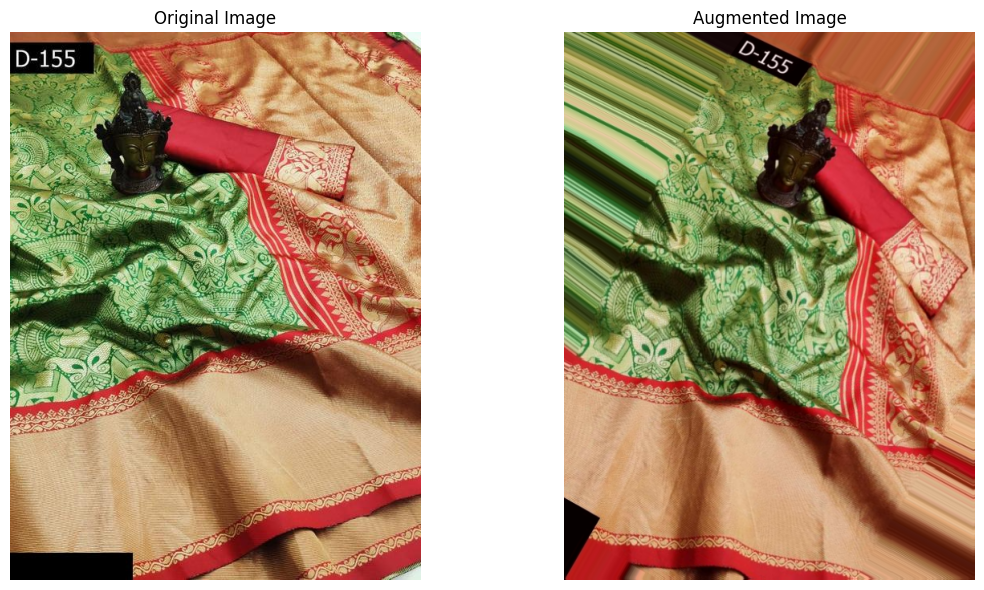

In [5]:
sarees_img = "/scratch/data/m23csa016/meesho_data/test_images/003790.jpg"
augmented_image = apply_saree_augmentation(sarees_img, "augmented_saree.jpg")

In [ ]:
def apply_multiple_augmentations(image_path, num_augmentations=5):
    image = cv2.imread(image_path)
    image = cv2.cvtColor(image, cv2.COLOR_BGR2RGB)
    
    # Create subplot grid
    rows = (num_augmentations + 1) // 3 + 1
    plt.figure(figsize=(15, 5*rows))
    
    # Plot original image
    plt.subplot(rows, 3, 1)
    plt.title('Original Image')
    plt.imshow(image)
    plt.axis('off')
    
    # Apply and plot multiple augmentations
    for i in range(num_augmentations):
        augmented = apply_saree_augmentation(image_path)
        plt.subplot(rows, 3, i+2)
        plt.title(f'Augmentation {i+1}')
        plt.imshow(augmented)
        plt.axis('off')
    
    plt.tight_layout()
    plt.show()

# Try multiple augmentations
apply_multiple_augmentations(sarees_img, num_augmentations=5)

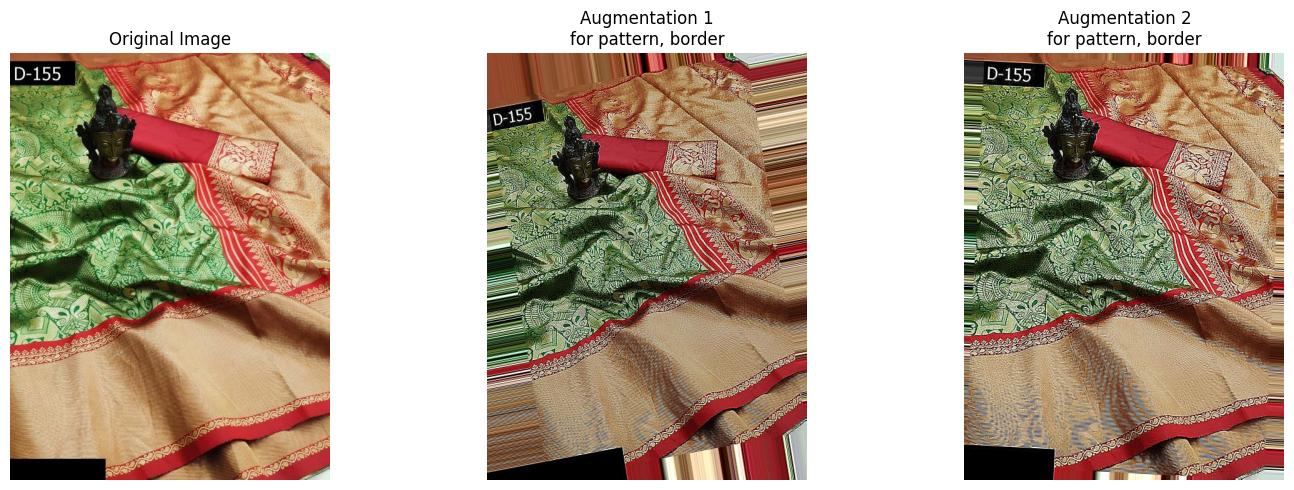

In [8]:
def attribute_specific_augment(image, target_attributes):
    """
    Apply specific augmentations based on target attributes
    """
    all_transforms = []
    
    if any(attr in target_attributes for attr in ['pattern', 'blouse_pattern', 'print_or_pattern_type']):
        all_transforms.extend([
            A.Sharpen(alpha=(0.2, 0.5), p=0.4),
            A.UnsharpMask(p=0.4),
        ])
    
    if 'border' in target_attributes or 'border_width' in target_attributes:
        all_transforms.extend([
            A.Sharpen(alpha=(0.2, 0.5), p=0.5),
            A.SafeRotate(limit=10, border_mode=cv2.BORDER_REPLICATE, p=0.5),
        ])
    
    if 'color' in target_attributes:
        all_transforms.extend([
            A.HueSaturationValue(
                hue_shift_limit=5,
                sat_shift_limit=10,
                val_shift_limit=10,
                p=0.7
            ),
        ])
    
    if 'transparency' in target_attributes:
        all_transforms.extend([
            A.RandomBrightnessContrast(
                brightness_limit=0.1,
                contrast_limit=0.1,
                p=0.5
            ),
        ])
    
    transforms = A.Compose(all_transforms)
    return transforms(image=image)['image']

# Example usage with visualization
def visualize_attribute_augmentations(image_path, attributes):
    image = cv2.imread(image_path)
    image = cv2.cvtColor(image, cv2.COLOR_BGR2RGB)
    
    plt.figure(figsize=(15, 5))
    
    plt.subplot(1, 3, 1)
    plt.title('Original Image')
    plt.imshow(image)
    plt.axis('off')
    
    # Apply and show two different augmentations
    for i in range(2):
        augmented = attribute_specific_augment(image, attributes)
        plt.subplot(1, 3, i+2)
        plt.title(f'Augmentation {i+1}\nfor {", ".join(attributes)}')
        plt.imshow(augmented)
        plt.axis('off')
    
    plt.tight_layout()
    plt.show()

# Example usage
attributes_to_test = ['pattern', 'border']
visualize_attribute_augmentations(sarees_img, attributes_to_test)

In [27]:
!pip install -U fashion-clip

     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 647.5/647.5 kB 7.3 MB/s eta 0:00:00
  Preparing metadata (setup.py) ... done
   ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 12.6/12.6 MB 50.4 MB/s eta 0:00:00a 0:00:01
  Created wheel for annoy: filename=annoy-1.17.3-cp310-cp310-linux_x86_64.whl size=77364 sha256=53f1d12aaf25685102790d225f328a491e10e62392137204a7c53dc444f4754c
  Stored in directory: /iitjhome/m23csa016/.cache/pip/wheels/64/8a/da/f714bcf46c5efdcfcac0559e63370c21abe961c48e3992465a
Successfully built annoy


In [28]:
from fashion_clip.fashion_clip import FashionCLIP

In [29]:
fclip = FashionCLIP('fashion-clip')

config.json:   0%|          | 0.00/4.46k [00:00<?, ?B/s]

model.safetensors:   0%|          | 0.00/605M [00:00<?, ?B/s]

preprocessor_config.json:   0%|          | 0.00/316 [00:00<?, ?B/s]

tokenizer_config.json:   0%|          | 0.00/568 [00:00<?, ?B/s]

vocab.json:   0%|          | 0.00/862k [00:00<?, ?B/s]

merges.txt:   0%|          | 0.00/525k [00:00<?, ?B/s]

tokenizer.json:   0%|          | 0.00/2.22M [00:00<?, ?B/s]

special_tokens_map.json:   0%|          | 0.00/389 [00:00<?, ?B/s]

/iitjhome/m23csa016/.conda/envs/meesho/lib/python3.10/site-packages/transformers/tokenization_utils_base.py:1617: FutureWarning: `clean_up_tokenization_spaces` was not set. It will be set to `True` by default. This behavior will be deprecated in transformers v4.45, and will be then set to `False` by default. For more details check this issue: https://github.com/huggingface/transformers/issues/31884
  warnings.warn(


In [32]:
sarees_img = "/scratch/data/m23csa016/meesho_data/test_images/003790.jpg"

embed = fclip.encode_images([sarees_img], batch_size=1)

100%|██████████| 1/1 [00:00<00:00,  1.97it/s]


In [34]:
embed.shape

(1, 512)

In [1]:
import pandas as pd

def fill_nulls_from_reference(train_df, reference_df):
    """
    Fill null values in train_df using values from reference_df
    
    Parameters:
    train_df (pandas.DataFrame): DataFrame containing null values to be filled
    reference_df (pandas.DataFrame): DataFrame containing reference values
    
    Returns:
    pandas.DataFrame: train_df with null values filled where possible
    """
    # Create a copy of train_df to avoid modifying the original
    result_df = train_df.copy()
    
    # Get common columns between the two datasets
    common_columns = list(set(train_df.columns) & set(reference_df.columns))
    
    # For each common column
    for column in common_columns:
        # Get null indices in train dataset
        null_indices = result_df[column].isnull()
        
        # If there are null values in this column
        if null_indices.any():
            # Create a mapping from index to value in reference dataset
            reference_values = reference_df[column].to_dict()
            
            # Fill null values where possible
            for idx in result_df[null_indices].index:
                if idx in reference_values and pd.notnull(reference_values[idx]):
                    result_df.at[idx, column] = reference_values[idx]
    
    # Calculate statistics about the fill operation
    fill_stats = {
        'total_nulls_before': train_df.isnull().sum().sum(),
        'total_nulls_after': result_df.isnull().sum().sum(),
        'nulls_filled': train_df.isnull().sum().sum() - result_df.isnull().sum().sum(),
        'columns_with_remaining_nulls': result_df.columns[result_df.isnull().any()].tolist()
    }
    
    return result_df, fill_stats

# Example usage:
train = pd.read_csv('/scratch/data/m23csa016/meesho_data/train.csv')
train_refined = pd.read_csv('/iitjhome/m23csa016/meesho_code/train_cvl_uf_ht_2_70k.csv')
filled_df, stats = fill_nulls_from_reference(train, train_refined)

# Print statistics
print(f"Total null values filled: {stats['nulls_filled']}")
print(f"Remaining null values: {stats['total_nulls_after']}")
print(f"Columns still containing nulls: {stats['columns_with_remaining_nulls']}")

Total null values filled: 248423
Remaining null values: 0
Columns still containing nulls: []


In [2]:
filled_df

,id,Category,len,attr_1,attr_2,attr_3,attr_4,attr_5,attr_6,attr_7,attr_8,attr_9,attr_10
0,0,Men Tshirts,5,default,round,printed,default,short sleeves,dummy,dummy,dummy,dummy,dummy
1,1,Men Tshirts,5,multicolor,polo,solid,solid,short sleeves,dummy,dummy,dummy,dummy,dummy
2,2,Men Tshirts,5,default,polo,solid,solid,short sleeves,dummy,dummy,dummy,dummy,dummy
3,3,Men Tshirts,5,multicolor,polo,solid,solid,short sleeves,dummy,dummy,dummy,dummy,dummy
4,4,Men Tshirts,5,multicolor,polo,solid,solid,short sleeves,dummy,dummy,dummy,dummy,dummy
...,...,...,...,...,...,...,...,...,...,...,...,...,...
70208,70374,Women Tops & Tunics,10,multicolor,fitted,regular,square neck,casual,printed,default,short sleeves,regular sleeves,ruffles
70209,70375,Women Tops & Tunics,10,yellow,regular,crop,round neck,casual,default,default,short sleeves,regular sleeves,knitted
70210,70376,Women Tops & Tunics,10,maroon,fitted,crop,round neck,casual,solid,solid,short sleeves,regular sleeves,knitted
70211,70377,Women Tops & Tunics,10,green,fitted,regular,high,casual,solid,solid,short sleeves,default,knitted


In [3]:
filled_df.to_csv("train_rw_cvl_uf_ht_2_70.csv", index=False)

In [1]:
import pandas as pd

# Load your dataset
data = pd.read_csv("/scratch/data/m23csa016/meesho_data/train.csv")

# Specify the column for the categories and the attributes
category_column = 'Category'

attributes = []
for i in range(1, 11):
    attributes.append(f"attr_{i}")

# Dictionary to store the results
category_attribute_counts = {}

# Loop through each attribute
for attribute in attributes:
    # Group by category and attribute, then count unique values for each attribute within each category
    attribute_counts = data.groupby([category_column, attribute]).size().reset_index(name='count')

    # Store the counts in the dictionary
    category_attribute_counts[attribute] = attribute_counts

# Print the counts for each attribute
for attribute, counts in category_attribute_counts.items():
    print(f"\nCounts for {attribute}:")
    print(counts)

# Save counts to CSV (optional)
for attribute, counts in category_attribute_counts.items():
    counts.to_csv(f'{attribute}_counts.csv', index=False)



Counts for attr_1:
               Category          attr_1  count
0                Kurtis           black   1395
1                Kurtis            blue    426
2                Kurtis           green    258
3                Kurtis            grey    137
4                Kurtis          maroon   1071
5                Kurtis      multicolor    407
6                Kurtis       navy blue    717
7                Kurtis          orange     33
8                Kurtis            pink    220
9                Kurtis          purple    170
10               Kurtis             red   1376
11               Kurtis           white     66
12               Kurtis          yellow    353
13          Men Tshirts           black    804
14          Men Tshirts         default   2132
15          Men Tshirts      multicolor   1821
16          Men Tshirts           white   1253
17               Sarees         default    856
18               Sarees  same as border   1611
19               Sarees   same as saree 

In [6]:
from rembg import remove
from PIL import Image 

image_path = "/scratch/data/m23csa016/meesho_data/train_images/015210.jpg"
# Load an
            # d preprocess image with category-specific augmentations
image = Image.open(image_path).convert('RGB')
print(image)
image = remove(image).convert('RGB')

<PIL.Image.Image image mode=RGB size=512x518 at 0x14ABCB357280>


In [7]:
print(image)

<PIL.Image.Image image mode=RGB size=512x518 at 0x14ABCB36B370>


In [ ]:
import os
from PIL import Image
from rembg import new_session, remove

train_img_dir = "/scratch/data/m23csa016/meesho_data/train_images"
output_dir = "/scratch/data/m23csa016/meesho_data/train_images_bg_removed"

session = new_session(model_name="birefnet-cod")

if not os.path.exists(output_dir):
    os.makedirs(output_dir)

for img in os.listdir(train_img_dir):
    image_path = os.path.join(train_img_dir, img)
    image = Image.open(image_path).convert('RGB')
    bg_removed = remove(image, session=session).convert('RGB')
    
    output_path = os.path.join(output_dir, img)
    bg_removed.save(output_path)

In [2]:
!pip install -qr https://huggingface.co/briaai/RMBG-1.4/resolve/main/requirements.txt


[notice] A new release of pip is available: 24.2 -> 24.3.1
[notice] To update, run: pip install --upgrade pip


In [3]:
from transformers import pipeline
image_path = "/scratch/data/m23csa016/meesho_data/train_images/015210.jpg"
pipe = pipeline("image-segmentation", model="briaai/RMBG-1.4", trust_remote_code=True)
pillow_mask = pipe(image_path, return_mask = True) # outputs a pillow mask
pillow_image = pipe(image_path) # applies mask on input and returns a pillow image


2024-10-30 20:10:20.100133: I tensorflow/core/platform/cpu_feature_guard.cc:193] This TensorFlow binary is optimized with oneAPI Deep Neural Network Library (oneDNN) to use the following CPU instructions in performance-critical operations:  AVX2 FMA
To enable them in other operations, rebuild TensorFlow with the appropriate compiler flags.
2024-10-30 20:10:20.934226: W tensorflow/compiler/xla/stream_executor/platform/default/dso_loader.cc:64] Could not load dynamic library 'libcudart.so.11.0'; dlerror: libcudart.so.11.0: cannot open shared object file: No such file or directory; LD_LIBRARY_PATH: /scratch/apps/packages/python/3.10/lib:/scratch/apps/spack/opt/spack/linux-rhel8-zen2/gcc-12.2.0/libfabric-1.20.1-6szl4hgeqn4sesvkpoyyeravkv2nipbb/lib64:/scratch/apps/spack/opt/spack/linux-rhel8-zen2/gcc-12.2.0/libfabric-1.20.1-6szl4hgeqn4sesvkpoyyeravkv2nipbb/lib:/opt/ohpc/pub/mpi/ucx-ohpc/1.14.0/lib:/opt/ohpc/pub/mpi/openmpi4-gnu12/4.1.4/lib:/opt/ohpc/pub/compiler/gcc/12.2.0/lib64
2024-10-30 

config.json:   0%|          | 0.00/548 [00:00<?, ?B/s]

MyConfig.py:   0%|          | 0.00/326 [00:00<?, ?B/s]

A new version of the following files was downloaded from https://huggingface.co/briaai/RMBG-1.4:
- MyConfig.py
. Make sure to double-check they do not contain any added malicious code. To avoid downloading new versions of the code file, you can pin a revision.


MyPipe.py:   0%|          | 0.00/2.92k [00:00<?, ?B/s]

A new version of the following files was downloaded from https://huggingface.co/briaai/RMBG-1.4:
- MyPipe.py
. Make sure to double-check they do not contain any added malicious code. To avoid downloading new versions of the code file, you can pin a revision.


briarmbg.py:   0%|          | 0.00/13.1k [00:00<?, ?B/s]

A new version of the following files was downloaded from https://huggingface.co/briaai/RMBG-1.4:
- briarmbg.py
. Make sure to double-check they do not contain any added malicious code. To avoid downloading new versions of the code file, you can pin a revision.


model.safetensors:   0%|          | 0.00/176M [00:00<?, ?B/s]

Hardware accelerator e.g. GPU is available in the environment, but no `device` argument is passed to the `Pipeline` object. Model will be on CPU.


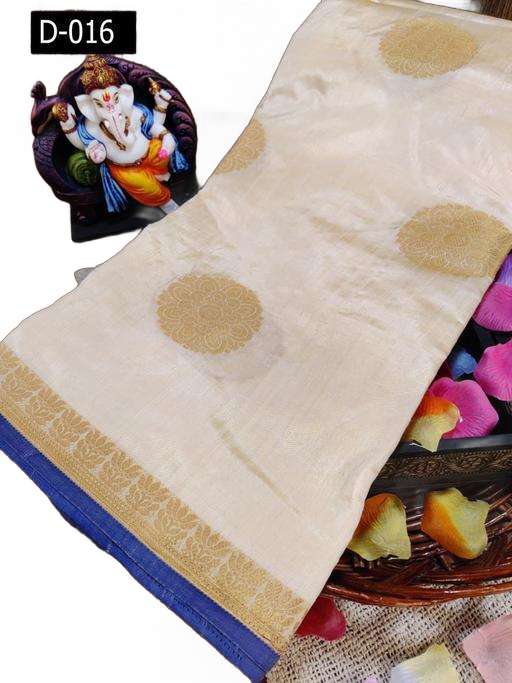

In [6]:
image_path = "/scratch/data/m23csa016/meesho_data/train_images/022210.jpg"
pillow_mask = pipe(image_path, return_mask = True) # outputs a pillow mask
pillow_image = pipe(image_path) # applies mask on input and returns a pillow image
pillow_image


In [27]:
import os
from transformers import AutoModelForImageSegmentation
from torchvision.transforms.functional import normalize
import torch.nn.functional as F
import torch
import numpy as np
from PIL import Image
import io

model = AutoModelForImageSegmentation.from_pretrained("briaai/RMBG-1.4", trust_remote_code=True)
device = torch.device("cuda:0" if torch.cuda.is_available() else "cpu")
model.to(device)

train_img_dir = "/scratch/data/m23csa016/meesho_data/train_images"
output_dir = "/scratch/data/m23csa016/meesho_data/train_images_bg_removed"


if not os.path.exists(output_dir):
    os.makedirs(output_dir)

def preprocess_image(im: np.ndarray, model_input_size: list) -> torch.Tensor:
    if len(im.shape) < 3:
        im = im[:, :, np.newaxis]
    im_tensor = torch.tensor(im, dtype=torch.float32).permute(2, 0, 1)
    im_tensor = F.interpolate(torch.unsqueeze(im_tensor, 0), size=model_input_size, mode='bilinear')
    image = torch.divide(im_tensor, 255.0)
    image = normalize(image, [0.5, 0.5, 0.5], [1.0, 1.0, 1.0])
    return image

def postprocess_image(result: torch.Tensor, im_size: list) -> np.ndarray:
    result = torch.squeeze(F.interpolate(result, size=im_size, mode='bilinear'), 0)
    ma = torch.max(result)
    mi = torch.min(result)
    result = (result - mi) / (ma - mi)
    im_array = (result * 255).permute(1, 2, 0).cpu().data.numpy().astype(np.uint8)
    im_array = np.squeeze(im_array)
    return im_array

from tqdm import tqdm

def process_batch(img_dir):
    images = os.listdir(img_dir)
    
    # Wrap the image processing loop with tqdm for progress tracking
    for image_file in tqdm(images, desc="Processing images", unit="image"):
        image_path = os.path.join(train_img_dir, image_file)
        orig_im = np.array(Image.open(image_path))
        orig_im_size = orig_im.shape[0:2]
        
        # Preprocess image
        processed_image = preprocess_image(orig_im, model_input_size=[512, 512])
        processed_image = processed_image.to(device)
        
        # Get model result
        result = model(processed_image)
        
        # Postprocess the result
        result_image = postprocess_image(result[0][0], orig_im_size)
        pil_im = Image.fromarray(result_image)
        
        # Create no background image
        no_bg_image = Image.new("RGBA", pil_im.size, (0, 0, 0, 0))
        orig_image = Image.open(image_path)
        no_bg_image.paste(orig_image, mask=pil_im)
        
        # Save the processed image as PNG
        save_path = os.path.join(output_dir, image_file.split(".")[0] + ".png")
        no_bg_image.save(save_path)



In [28]:
process_batch(train_img_dir)

Processing images:   0%|                                                                             | 0/70379 [00:00<?, ?image/s]

Processing images: 100%|███████████████████████████████████████████████████████████████| 70379/70379 [2:14:41<00:00,  8.71image/s]


In [1]:
se = None
if se:
    print("Nhi hota hai")

In [1]:
import pandas as pd
train_parq = pd.read_parquet("/scratch/data/m23csa016/meesho_data/cvl_nobg_max_train_em_1.parquet")

In [2]:
train_parq

,filename,feature_0,feature_1,feature_2,feature_3,feature_4,feature_5,feature_6,feature_7,feature_8,...,feature_758,feature_759,feature_760,feature_761,feature_762,feature_763,feature_764,feature_765,feature_766,feature_767
0,061848.png,-0.152466,0.996094,0.055542,0.317139,0.089172,-0.283203,-0.511719,-0.072510,-0.514648,...,-0.572754,0.007545,-0.493164,-0.406250,-0.112488,-0.747559,0.761719,0.248535,0.309326,-0.299316
1,009741.png,-0.360107,0.222046,-0.275391,-0.294678,-0.446777,-0.565430,0.009903,-0.219482,0.477295,...,-0.438477,0.663086,0.216919,0.102295,-0.154663,-0.173950,0.117737,-0.541504,0.805664,-0.225830
2,055030.png,1.144531,-0.152832,0.637695,0.508789,-0.117371,0.352783,-0.495361,-0.177124,0.619141,...,-0.342773,-1.519531,0.130249,0.603516,-0.806641,0.227417,0.275879,-1.029297,0.061340,1.298828
3,046888.png,-0.251221,-1.645508,-0.583496,-0.066040,0.111267,0.436035,0.600586,0.133179,-0.893555,...,-0.650391,-0.843262,-0.582031,0.016205,-0.176025,0.370850,-1.225586,0.270752,-0.076721,-0.583984
4,054019.png,0.347168,0.028793,-0.462402,0.435059,0.127319,-0.343506,-0.232056,0.916016,-1.496094,...,0.719238,1.014648,-0.793945,0.240723,0.571289,-0.452637,-0.036011,-0.984375,0.627930,-0.737305
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
70375,022360.png,1.222656,1.125000,-0.614746,0.612305,0.010727,0.418213,0.795898,-0.118286,0.121277,...,-0.863281,-0.129639,-0.287598,-0.440918,0.249023,-0.346680,0.223145,0.201660,0.464111,0.424561
70376,069584.png,0.447266,-0.892578,-0.684570,-0.051788,-1.001953,-0.137817,-0.069763,1.191406,1.445312,...,-0.193726,0.388184,-0.104309,0.519043,0.483887,-0.504395,0.154785,-0.181519,0.402832,0.890625
70377,037797.png,0.078430,-0.565918,0.224365,0.307617,0.461426,-1.216797,0.476074,-0.702148,0.379883,...,-0.063721,-0.049011,0.410156,0.416992,-0.646484,-0.687500,0.464111,-1.073242,1.548828,0.047638
70378,059511.png,0.899414,0.232910,-0.160034,-0.742188,-0.148071,0.091919,0.026398,0.577148,0.548340,...,-1.553711,0.501465,0.176147,1.154297,-0.337891,-0.772461,-0.156982,-0.585938,-0.545898,0.822266


In [1]:
import pandas as pd

# Load your dataset
data = pd.read_csv("/scratch/data/m23csa016/meesho_data/train.csv")
corrected = pd.read_csv("corrected_train_labels.csv")

# Specify the column for the categories and the attributes
category_column = 'Category'

attributes = []
for i in range(1, 11):
    attributes.append(f"attr_{i}")

# Dictionary to store the results
category_attribute_counts = {}

# Loop through each attribute
for attribute in attributes:
    # Group by category and attribute, then count unique values for each attribute within each category
    attribute_counts = data.groupby([category_column, attribute]).size().reset_index(name='count')

    corrected_counts = corrected.groupby([category_column, attribute]).size().reset_index(name='count')

    # Store the counts in the dictionary
    category_attribute_counts[attribute] = [attribute_counts, corrected_counts]

# Print the counts for each attribute
for attribute, counts in category_attribute_counts.items():
    print(f"\nCounts for {attribute}:")
    print(f"Original: {counts[0]}\n Corrected: {counts[1]}")

# # Save counts to CSV (optional)
# for attribute, counts in category_attribute_counts.items():
#     counts.to_csv(f'{attribute}_counts.csv', index=False)



Counts for attr_1:
Original:                Category          attr_1  count
0                Kurtis           black   1395
1                Kurtis            blue    426
2                Kurtis           green    258
3                Kurtis            grey    137
4                Kurtis          maroon   1071
5                Kurtis      multicolor    407
6                Kurtis       navy blue    717
7                Kurtis          orange     33
8                Kurtis            pink    220
9                Kurtis          purple    170
10               Kurtis             red   1376
11               Kurtis           white     66
12               Kurtis          yellow    353
13          Men Tshirts           black    804
14          Men Tshirts         default   2132
15          Men Tshirts      multicolor   1821
16          Men Tshirts           white   1253
17               Sarees         default    856
18               Sarees  same as border   1611
19               Sarees   same

In [2]:
bm_e8 = pd.read_csv("/iitjhome/m23csa016/meesho_code/results/bm_e8_default.csv")
sub_e8 = pd.read_csv("/iitjhome/m23csa016/meesho_code/results/cvl_uf_ht_70k_epoch_8_val_85_61.csv")

In [4]:
(bm_e8 == 'default').sum().sum()

53594

In [5]:
(sub_e8 == 'default').sum().sum()

36962